# <font color='blue'>Churn in Telecom's Dataset</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

**Customer Churn** ou Rotatividade de Clientes, em uma tradução livre para o português é um termo utilizado para caracterizar a decisão tomada pelo cliente de cancelar o contrato com a empresa. Por essa razão, está diretamente relacionado com a perda de clientes. <br>
Customer Churn é uma taxa que indica o quanto uma determinada empresa perdeu de clientes. Para calcular o churn, basta dividir a quantidade de clientes que perdeu em certo período pelo total de clientes que permaneceram ativos. Por exemplo, se a empresa perdeu 10 clientes de 100, a churn rate é de 10%.<br>
Portanto, entender por que os clientes abandonam o produto ou serviço é vital para conquistar o crescimento da empresa. Como o Churn tem um efeito negativo na receita de uma empresa, entender o que é esse indicador e como trabalhar para mitigar essa métrica é algo crítico para o sucesso de muitos negócios. <br>
O conjunto de dados possui 20 variáveis preditoras. A coluna **Churn** é a variável alvo e possui valores booleanos, onde o valor False indica que o cliente não abandonou a empresa e o valor True indica que houve abandono. Sendo assim, estamos diante de um problema de classificação binária.<br><br>
Endereço do conjunto de dados: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset <br>


</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Balanceamento de classes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

# Seleção de variáveis
from sklearn.feature_selection import RFE, SelectKBest

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

In [3]:
# Coletando os dados 
df = pd.read_csv('Dados/Churn-in-Telecom/churn-in-telecom.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [4]:
# Preparando o dataframe
colunas = ["Estado", "Tamanho Conta", "Cod area", "Numero Telefone", "Plano Internacional", "Plano correio de voz", "Numero mensagens vmail", "Total minutos diarios",
           "Total chamadas diarias", "Total carga diaria", "Total minutos a tarde", "Total chamadas a tarde", "Total carga a tarde", "Total minutos a noite",
           "Total chamadas a noite", "Total carga a noite", "Total minutos internacionais", "Total chamadas internacionais", "Total carga internacional", 
           "Numero chamadas atendimento ao cliente", "rotatividade"]
variavelAlvo = "rotatividade"
df.columns = colunas
df.head()

Estado  Tamanho Conta  Cod area Numero Telefone Plano Internacional  \
0     KS            128       415        382-4657                  no   
1     OH            107       415        371-7191                  no   
2     NJ            137       415        358-1921                  no   
3     OH             84       408        375-9999                 yes   
4     OK             75       415        330-6626                 yes   

  Plano correio de voz  Numero mensagens vmail  Total minutos diarios  \
0                  yes                      25                  265.1   
1                  yes                      26                  161.6   
2                   no                       0                  243.4   
3                   no                       0                  299.4   
4                   no                       0                  166.7   

   Total chamadas diarias  Total carga diaria  ...  Total chamadas a tarde  \
0                     110               45.07  ...                      99   
1                     123               27.47  ...                     103   
2                     114               41.38  ...                     110   
3                      71               50.90  ...                      88   
4                     113               28.34  ...                     122   

   Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
0                16.78                  244.7                      91   
1                16.62                  254.4                     103   
2                10.30                  162.6                     104   
3                 5.26                  196.9                      89   
4                12.61                  186.9                     121   

   Total carga a noite  Total minutos internacionais  \
0                11.01                          10.0   
1                11.45                          13.7   
2                 7.32                          12.2   
3                 8.86                           6.6   
4                 8.41                          10.1   

   Total chamadas internacionais  Total carga internacional  \
0                              3                       2.70   
1                              3                       3.70   
2                              5                       3.29   
3                              7                       1.78   
4                              3                       2.73   

   Numero chamadas atendimento ao cliente  rotatividade  
0                                       1         False  
1                                       1         False  
2                                       0         False  
3                                       2         False  
4                                       3         False  

[5 rows x 21 columns]

In [5]:
# Excluindo a variavel Numero Telefone
df.drop(["Numero Telefone"], axis=1, inplace = True)

# Atualizando a variável colunas
colunas = df.columns
df.head()

Estado  Tamanho Conta  Cod area Plano Internacional Plano correio de voz  \
0     KS            128       415                  no                  yes   
1     OH            107       415                  no                  yes   
2     NJ            137       415                  no                   no   
3     OH             84       408                 yes                   no   
4     OK             75       415                 yes                   no   

   Numero mensagens vmail  Total minutos diarios  Total chamadas diarias  \
0                      25                  265.1                     110   
1                      26                  161.6                     123   
2                       0                  243.4                     114   
3                       0                  299.4                      71   
4                       0                  166.7                     113   

   Total carga diaria  Total minutos a tarde  Total chamadas a tarde  \
0               45.07                  197.4                      99   
1               27.47                  195.5                     103   
2               41.38                  121.2                     110   
3               50.90                   61.9                      88   
4               28.34                  148.3                     122   

   Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
0                16.78                  244.7                      91   
1                16.62                  254.4                     103   
2                10.30                  162.6                     104   
3                 5.26                  196.9                      89   
4                12.61                  186.9                     121   

   Total carga a noite  Total minutos internacionais  \
0                11.01                          10.0   
1                11.45                          13.7   
2                 7.32                          12.2   
3                 8.86                           6.6   
4                 8.41                          10.1   

   Total chamadas internacionais  Total carga internacional  \
0                              3                       2.70   
1                              3                       3.70   
2                              5                       3.29   
3                              7                       1.78   
4                              3                       2.73   

   Numero chamadas atendimento ao cliente  rotatividade  
0                                       1         False  
1                                       1         False  
2                                       0         False  
3                                       2         False  
4                                       3         False

## 3 - Reservar linhas para validar o modelo

In [6]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=30)
dfValidacao

Estado  Tamanho Conta  Cod area Plano Internacional Plano correio de voz  \
1077     NY            108       415                  no                   no   
3105     ME             57       415                  no                   no   

      Numero mensagens vmail  Total minutos diarios  Total chamadas diarias  \
1077                       0                  154.2                     123   
3105                       0                  221.1                     101   

      Total carga diaria  Total minutos a tarde  Total chamadas a tarde  \
1077               26.21                  112.3                      86   
3105               37.59                  236.7                      65   

      Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
1077                 9.55                  246.4                      75   
3105                20.12                  252.3                     137   

      Total carga a noite  Total minutos internacionais  \
1077                11.09                          15.4   
3105                11.35                           9.5   

      Total chamadas internacionais  Total carga internacional  \
1077                              4                       4.16   
3105                              1                       2.57   

      Numero chamadas atendimento ao cliente  rotatividade  
1077                                       4          True  
3105                                       0         False

In [7]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

index Estado  Tamanho Conta  Cod area Plano Internacional  \
0      0     KS            128       415                  no   
1      1     OH            107       415                  no   
2      2     NJ            137       415                  no   
3      3     OH             84       408                 yes   
4      4     OK             75       415                 yes   

  Plano correio de voz  Numero mensagens vmail  Total minutos diarios  \
0                  yes                      25                  265.1   
1                  yes                      26                  161.6   
2                   no                       0                  243.4   
3                   no                       0                  299.4   
4                   no                       0                  166.7   

   Total chamadas diarias  Total carga diaria  ...  Total chamadas a tarde  \
0                     110               45.07  ...                      99   
1                     123               27.47  ...                     103   
2                     114               41.38  ...                     110   
3                      71               50.90  ...                      88   
4                     113               28.34  ...                     122   

   Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
0                16.78                  244.7                      91   
1                16.62                  254.4                     103   
2                10.30                  162.6                     104   
3                 5.26                  196.9                      89   
4                12.61                  186.9                     121   

   Total carga a noite  Total minutos internacionais  \
0                11.01                          10.0   
1                11.45                          13.7   
2                 7.32                          12.2   
3                 8.86                           6.6   
4                 8.41                          10.1   

   Total chamadas internacionais  Total carga internacional  \
0                              3                       2.70   
1                              3                       3.70   
2                              5                       3.29   
3                              7                       1.78   
4                              3                       2.73   

   Numero chamadas atendimento ao cliente  rotatividade  
0                                       1         False  
1                                       1         False  
2                                       0         False  
3                                       2         False  
4                                       3         False  

[5 rows x 21 columns]

In [8]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

Estado  Tamanho Conta  Cod area Plano Internacional Plano correio de voz  \
0     KS            128       415                  no                  yes   
1     OH            107       415                  no                  yes   
2     NJ            137       415                  no                   no   
3     OH             84       408                 yes                   no   
4     OK             75       415                 yes                   no   

   Numero mensagens vmail  Total minutos diarios  Total chamadas diarias  \
0                      25                  265.1                     110   
1                      26                  161.6                     123   
2                       0                  243.4                     114   
3                       0                  299.4                      71   
4                       0                  166.7                     113   

   Total carga diaria  Total minutos a tarde  Total chamadas a tarde  \
0               45.07                  197.4                      99   
1               27.47                  195.5                     103   
2               41.38                  121.2                     110   
3               50.90                   61.9                      88   
4               28.34                  148.3                     122   

   Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
0                16.78                  244.7                      91   
1                16.62                  254.4                     103   
2                10.30                  162.6                     104   
3                 5.26                  196.9                      89   
4                12.61                  186.9                     121   

   Total carga a noite  Total minutos internacionais  \
0                11.01                          10.0   
1                11.45                          13.7   
2                 7.32                          12.2   
3                 8.86                           6.6   
4                 8.41                          10.1   

   Total chamadas internacionais  Total carga internacional  \
0                              3                       2.70   
1                              3                       3.70   
2                              5                       3.29   
3                              7                       1.78   
4                              3                       2.73   

   Numero chamadas atendimento ao cliente  rotatividade  
0                                       1         False  
1                                       1         False  
2                                       0         False  
3                                       2         False  
4                                       3         False

## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [9]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Estado                                  3331 non-null   object 
 1   Tamanho Conta                           3331 non-null   int64  
 2   Cod area                                3331 non-null   int64  
 3   Plano Internacional                     3331 non-null   object 
 4   Plano correio de voz                    3331 non-null   object 
 5   Numero mensagens vmail                  3331 non-null   int64  
 6   Total minutos diarios                   3331 non-null   float64
 7   Total chamadas diarias                  3331 non-null   int64  
 8   Total carga diaria                      3331 non-null   float64
 9   Total minutos a tarde                   3331 non-null   float64
 10  Total chamadas a tarde                  3331 non-null   int6

In [10]:
# Sumário estatístico
df.describe()

Tamanho Conta     Cod area  Numero mensagens vmail  \
count    3331.000000  3331.000000             3331.000000   
mean      101.075953   437.195737                8.103873   
std        39.826560    42.380524               13.691036   
min         1.000000   408.000000                0.000000   
25%        74.000000   408.000000                0.000000   
50%       101.000000   415.000000                0.000000   
75%       127.000000   510.000000               20.000000   
max       243.000000   510.000000               51.000000   

       Total minutos diarios  Total chamadas diarias  Total carga diaria  \
count            3331.000000             3331.000000         3331.000000   
mean              179.770369              100.428700           30.561504   
std                54.477234               20.071298            9.261107   
min                 0.000000                0.000000            0.000000   
25%               143.650000               87.000000           24.420000   
50%               179.400000              101.000000           30.500000   
75%               216.350000              114.000000           36.780000   
max               350.800000              165.000000           59.640000   

       Total minutos a tarde  Total chamadas a tarde  Total carga a tarde  \
count            3331.000000             3331.000000          3331.000000   
mean              200.996247              100.129090            17.084890   
std                50.702009               19.917808             4.309664   
min                 0.000000                0.000000             0.000000   
25%               166.600000               87.000000            14.160000   
50%               201.400000              100.000000            17.120000   
75%               235.300000              114.000000            20.000000   
max               363.700000              170.000000            30.910000   

       Total minutos a noite  Total chamadas a noite  Total carga a noite  \
count             3331.00000             3331.000000          3331.000000   
mean               200.84293              100.104173             9.038016   
std                 50.57502               19.559203             2.275926   
min                 23.20000               33.000000             1.040000   
25%                167.00000               87.000000             7.520000   
50%                201.10000              100.000000             9.050000   
75%                235.30000              113.000000            10.590000   
max                395.00000              175.000000            17.770000   

       Total minutos internacionais  Total chamadas internacionais  \
count                   3331.000000                    3331.000000   
mean                      10.235965                       4.480636   
std                        2.791215                       2.461200   
min                        0.000000                       0.000000   
25%                        8.500000                       3.000000   
50%                       10.300000                       4.000000   
75%                       12.100000                       6.000000   
max                       20.000000                      20.000000   

       Total carga internacional  Numero chamadas atendimento ao cliente  
count                3331.000000                             3331.000000  
mean                    2.764221                                1.562594  
std                     0.753603                                1.314929  
min                     0.000000                                0.000000  
25%                     2.300000                                1.000000  
50%                     2.780000                                1.000000  
75%                     3.270000                                2.000000  
max                     5.400000                                9.000000

#### 4.2 Tratando valores nulos

In [ ]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum() 

In [ ]:
# Cria o objeto do tipo SimpleImputer com a média como estratégia  
imputeMedia = SimpleImputer(missing_values=np.nan, strategy= "mean")

In [ ]:
# Treina o objeto do tipo SimpleImputer, substitui os valores nulos pela média em cada coluna com valor NA
for k in df.columns[0:9]:
    
    # Verifica se a coluna possui valores nulos e se os valores não são do tipo texto
    if df2[k].isnull().sum() > 0 and df2[k].dtype != objetct:
        
        # Realiza a imputação nos dados nulos
        df2[k] = imputeMedia.fit_transform(df2[k].values.reshape(-1,1))

#### 4.3 - Tratando dados duplicados

In [11]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira, é igual a outra
df.duplicated().sum()

0

In [ ]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha
df.drop_duplicates(ignore_index=True, inplace = True)

#### 4.4 - Tratando valores únicos

In [12]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df.nunique()

Estado                                      51
Tamanho Conta                              212
Cod area                                     3
Plano Internacional                          2
Plano correio de voz                         2
Numero mensagens vmail                      46
Total minutos diarios                     1667
Total chamadas diarias                     119
Total carga diaria                        1667
Total minutos a tarde                     1610
Total chamadas a tarde                     123
Total carga a tarde                       1439
Total minutos a noite                     1589
Total chamadas a noite                     120
Total carga a noite                        933
Total minutos internacionais               162
Total chamadas internacionais               21
Total carga internacional                  162
Numero chamadas atendimento ao cliente      10
rotatividade                                 2
dtype: int64

##### 4.4.1 - Criando uma nova coluna com a variável Total minutos diarios agrupada

In [ ]:
# Indicando a variável que terá os valores agrupados
variavelParaAgrupar = "Total minutos diarios"

# Visualizando os agrupamentos
np.histogram(df[variavelParaAgrupar], bins = 4)

In [ ]:
# Criando uma nova coluna com valores nulos
df[variavelParaAgrupar + "_Agrup"] = np.nan

# Criando os valores da nova coluna com base em uma outra coluna
df.loc[(df[variavelParaAgrupar] >= 0) & (df[variavelParaAgrupar] < 88), variavelParaAgrupar + "_Agrup"] = 'Baixo'
df.loc[(df[variavelParaAgrupar] >= 88) & (df[variavelParaAgrupar] < 175), variavelParaAgrupar + "_Agrup"] = 'Médio'
df.loc[(df[variavelParaAgrupar] >= 175) & (df[variavelParaAgrupar] < 263), variavelParaAgrupar + "_Agrup"] = 'Alto'
df.loc[df[variavelParaAgrupar] >= 263, variavelParaAgrupar + "_Agrup"] = 'Muito Alto' 
    
df.head()

##### 4.4.2 - Excluindo as colunas que tiveram os valores agrupados

In [ ]:
# Excluindo coluna
df.drop(["Total minutos diarios"], axis=1, inplace = True)
df.head()

In [ ]:
# Organizando o dataframe
valoresVariavelAlvo = df[variavelAlvo]
df.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df[variavelAlvo] = valoresVariavelAlvo
df.columns

#### 4.5 - Análise descritiva dos dados

##### 4.5.1 - Parâmetros dos gráficos

In [13]:
# Define a paleta de cores
sns.color_palette("pastel")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.5.2 - Funções para desenhar os gráficos

###### a) Histograma

In [14]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Boxplot

In [15]:
# Função para plotar um Boxplot
def desenhaBoxplot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(data=coluna)
    ax.set_title("Boxplot da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xticklabels([variavelAnalisada]) # exibe o nome da variável
    larguraBox = 0.63
    i=0

    # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
    q1, q2, q3 = coluna.quantile(0.25), coluna.quantile(0.5), coluna.quantile(0.75)
    
    # Lista com os quartis
    quartis = [q1, q2, q3]

    # Exibe os quartis no gráfico
    for q in quartis:
        x = i-larguraBox/2
        y = q
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x-0.1, y), textcoords='data',
                    va='center', ha='right')
    plt.show()

###### c) Boxplot agrupado

In [16]:
# Função para plotar um Boxplot Agrupado
def desenhaBoxplotAgrupado(coluna, colunaAlvo, variavelAnalisada): 
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(x=colunaAlvo, y=coluna, hue=colunaAlvo)
    ax.set_title("Boxplot da variável " + variavelAnalisada + " de acordo com "+ variavelAlvo, fontsize = 16)
    ax.legend(loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    
    larguraBox = 0.60
    i=0
    
    # Exibe os quartis no gráfico
    for nome, grupo in df.groupby(variavelAlvo):
        # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
        q1, q2, q3 = grupo[variavelAnalisada].quantile(0.25), grupo[variavelAnalisada].quantile(0.5), grupo[variavelAnalisada].quantile(0.75)

        # Lista com os quartis
        quartis = [q1, q2, q3]

        # Exibe os quartis no gráfico
        for q in quartis:
            x = i-larguraBox/2
            y = q
            ax.annotate('%.2f' % q, (x,y),
                        xytext=(x-0.1, y), textcoords='data',
                        va='center', ha='right')
        i+=1.25
    
    plt.show()

###### d) Gráfico de Pizza

In [17]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

###### e) Countplot

In [18]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots()
    ax = sns.countplot(x=coluna, order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### f) Scatter Plot

In [19]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):
    
    # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY) 
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)
    plt.show()

###### g) Matriz de Confusão

In [20]:
# Função para plotar uma matriz de confusão
def desenhaMatrizConfusao(yDadosDeTeste, valoresPrevistos, modelo):
    
    # Criando a matriz de confusão
    matrizDeConfusao = confusion_matrix(yDadosDeTeste, valoresPrevistos, labels=modelo.classes_)

    # Plotando a matriz de confusão 
    ax = ConfusionMatrixDisplay(confusion_matrix=matrizDeConfusao, display_labels=df[variavelAlvo].unique())
    ax.plot(cmap = "Blues")
    plt.grid(False)
    plt.show()

###### h) Gráfico da tabela de classificação cruzada

In [21]:
def desenhaClassificacaoCruzada(coluna, variavelAnalisada):
    
    # Criando uma tabela de classificação cruzada das frequências absolutas.
    ax = pd.crosstab(df[variavelAlvo], coluna, rownames=[variavelAlvo], colnames=[variavelAnalisada]).plot.bar()
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada + " de acordo com " + variavelAlvo, fontsize = 16)
    # Exibe os valores de cada coluna
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.xticks(rotation=0)
    ax.legend(loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    plt.show()

##### 4.5.3 Análise descritiva das variáveis quantitativas

Resumo estatístico da variável Tamanho Conta
 count    3331.000000
mean      101.075953
std        39.826560
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Tamanho Conta, dtype: float64


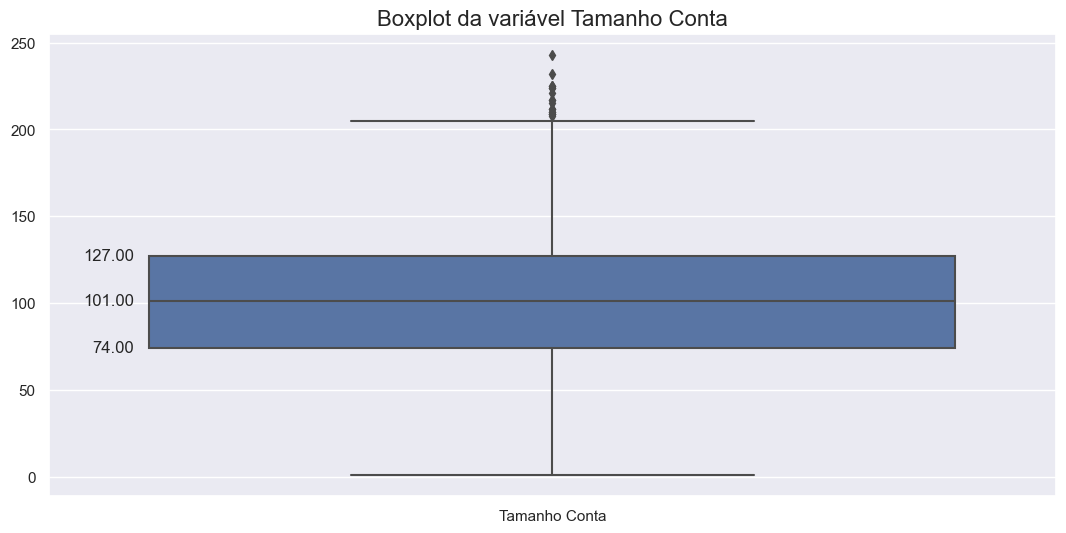

Resumo estatístico da variável Cod area
 count    3331.000000
mean      437.195737
std        42.380524
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: Cod area, dtype: float64


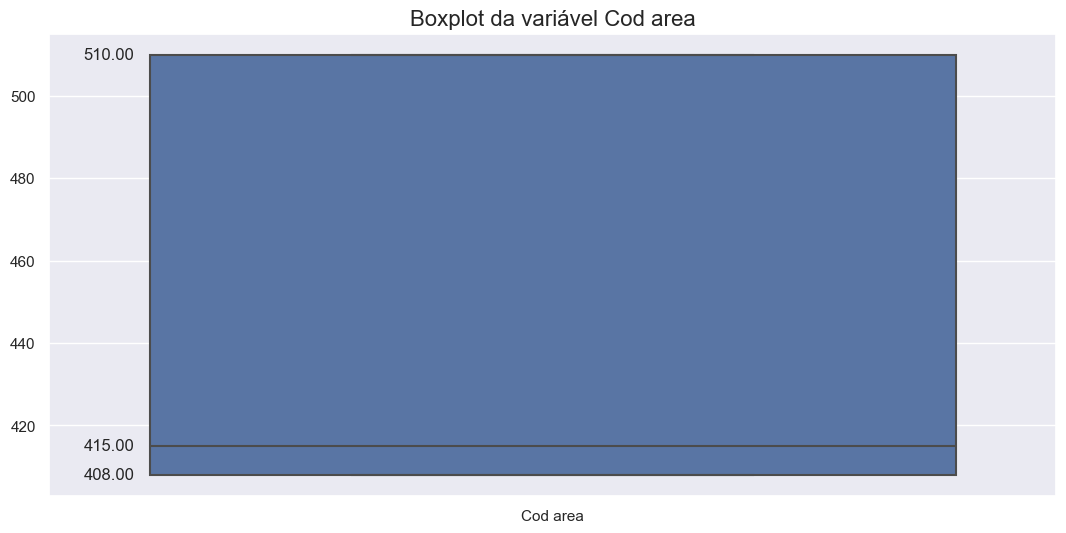

Resumo estatístico da variável Numero mensagens vmail
 count    3331.000000
mean        8.103873
std        13.691036
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Numero mensagens vmail, dtype: float64


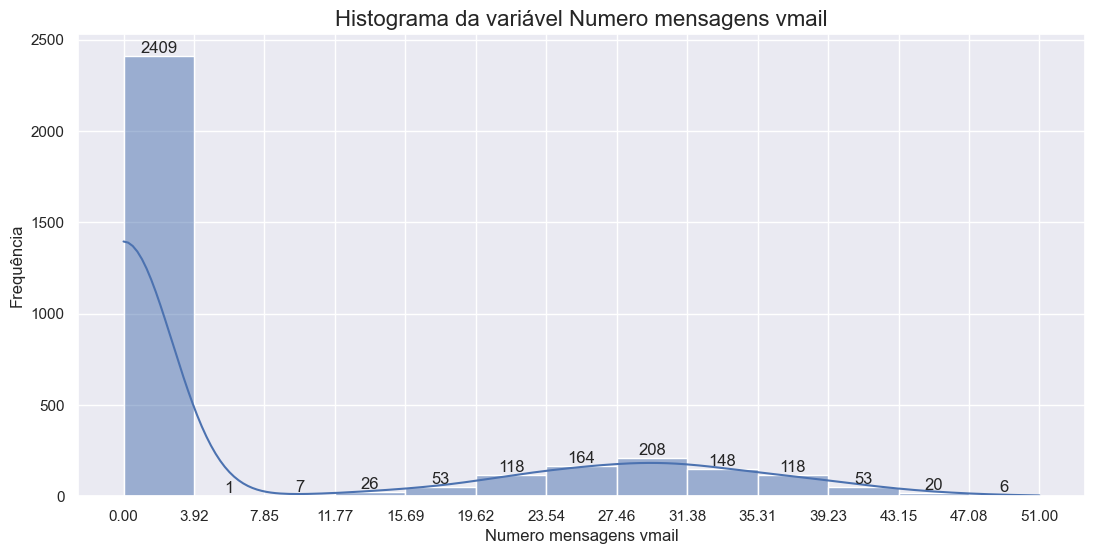

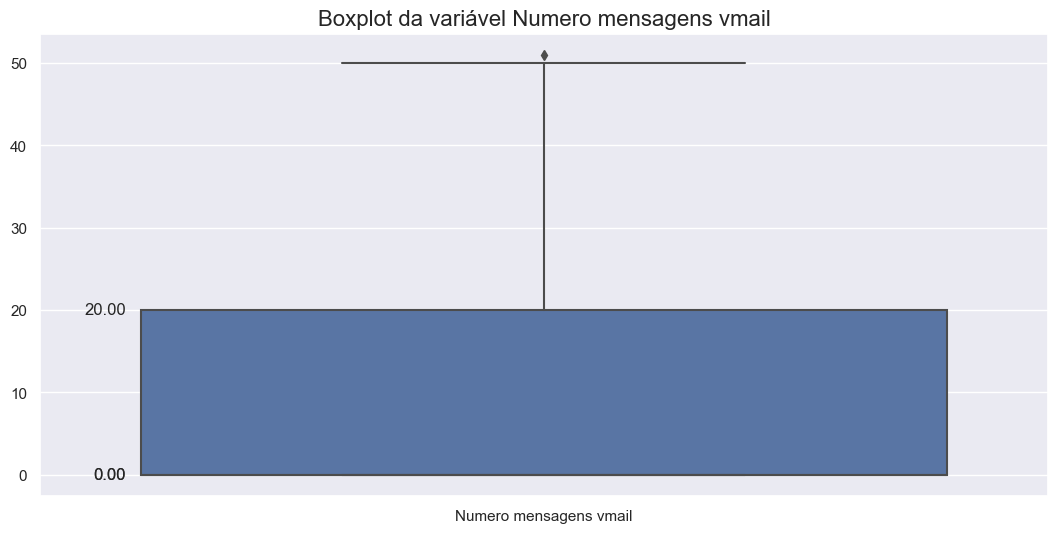

Resumo estatístico da variável Total minutos diarios
 count    3331.000000
mean      179.770369
std        54.477234
min         0.000000
25%       143.650000
50%       179.400000
75%       216.350000
max       350.800000
Name: Total minutos diarios, dtype: float64


Resumo estatístico da variável Total chamadas diarias
 count    3331.000000
mean      100.428700
std        20.071298
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Total chamadas diarias, dtype: float64


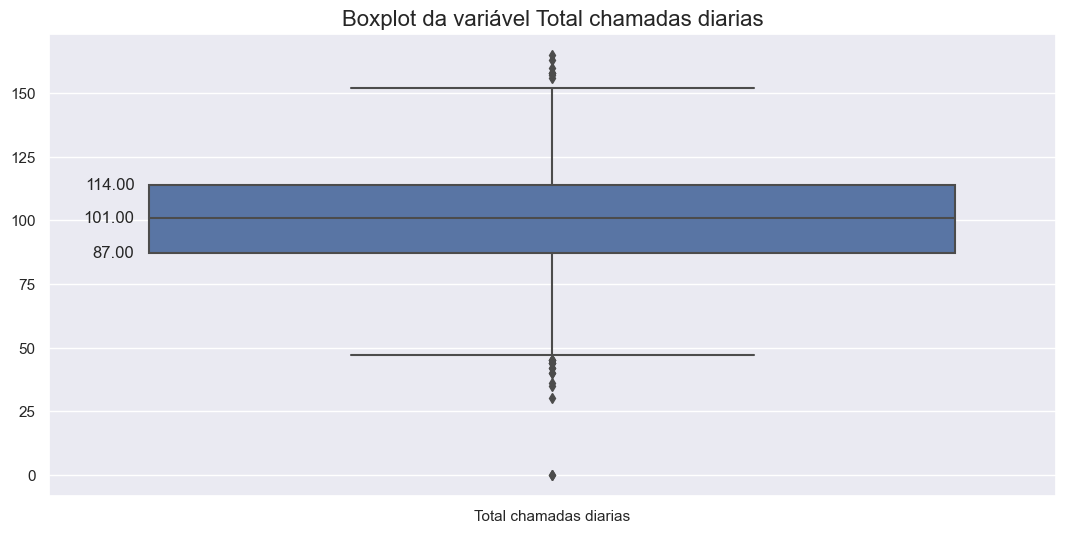

Resumo estatístico da variável Total carga diaria
 count    3331.000000
mean       30.561504
std         9.261107
min         0.000000
25%        24.420000
50%        30.500000
75%        36.780000
max        59.640000
Name: Total carga diaria, dtype: float64


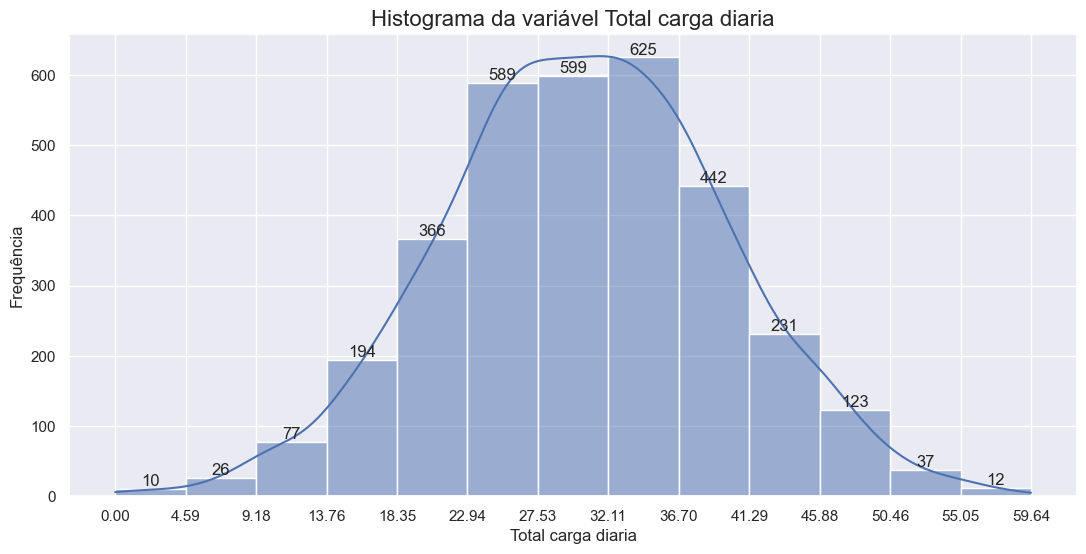

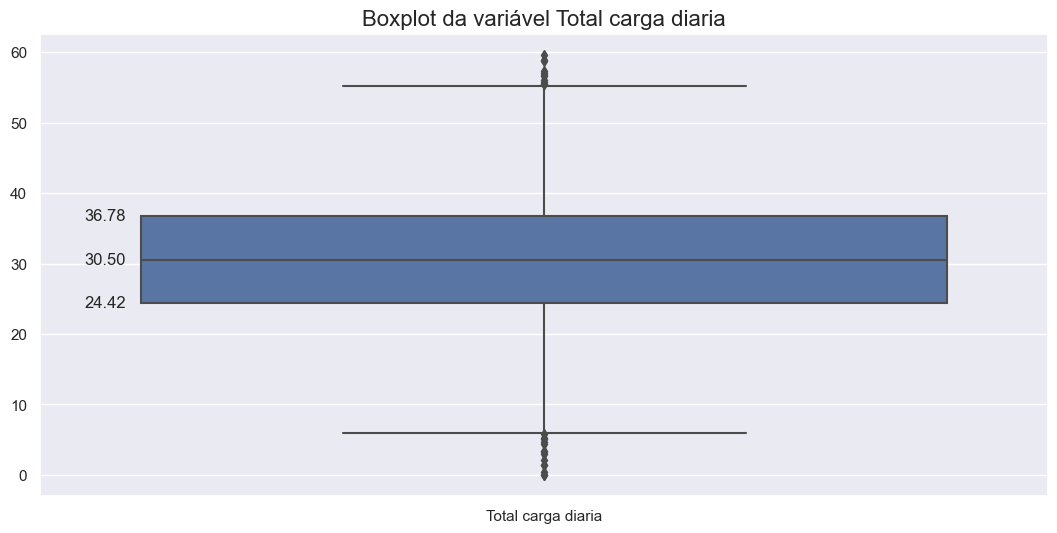

Resumo estatístico da variável Total minutos a tarde
 count    3331.000000
mean      200.996247
std        50.702009
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: Total minutos a tarde, dtype: float64


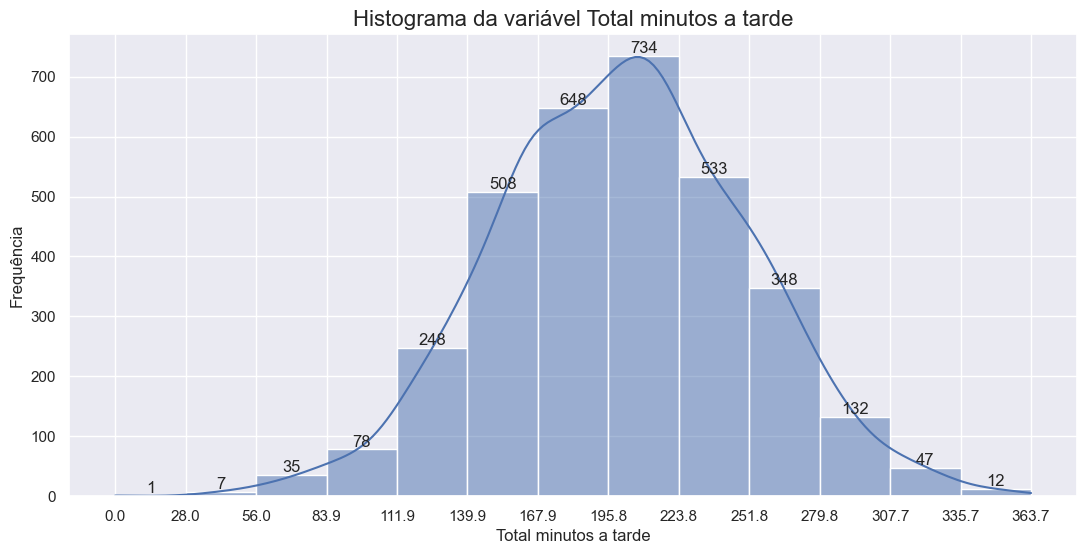

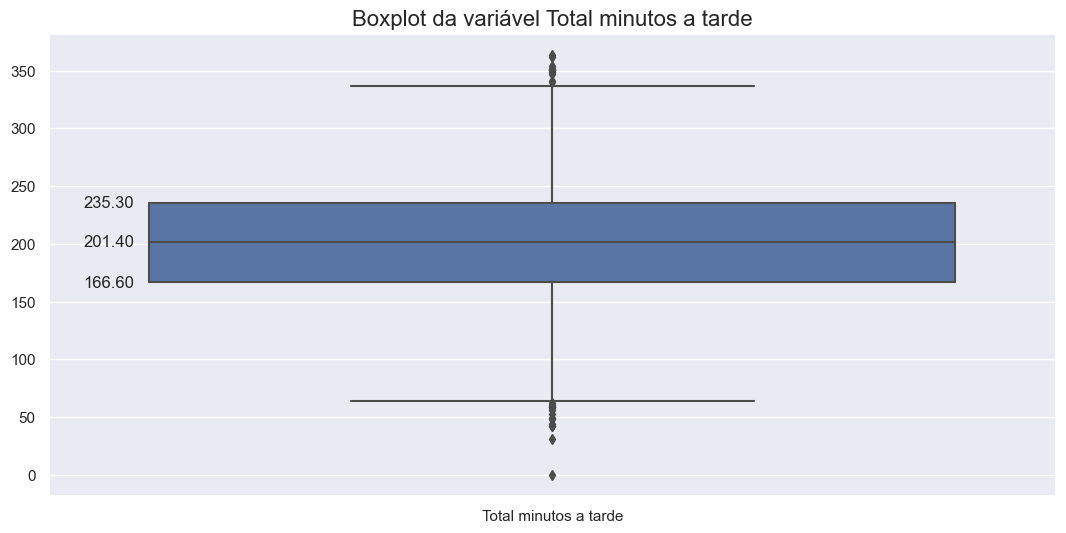

Resumo estatístico da variável Total chamadas a tarde
 count    3331.000000
mean      100.129090
std        19.917808
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Total chamadas a tarde, dtype: float64


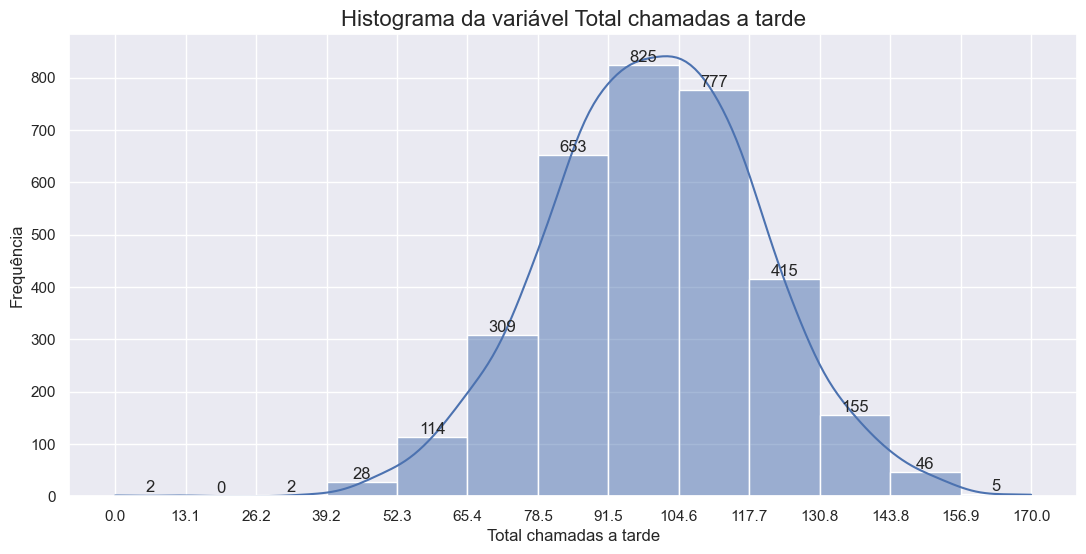

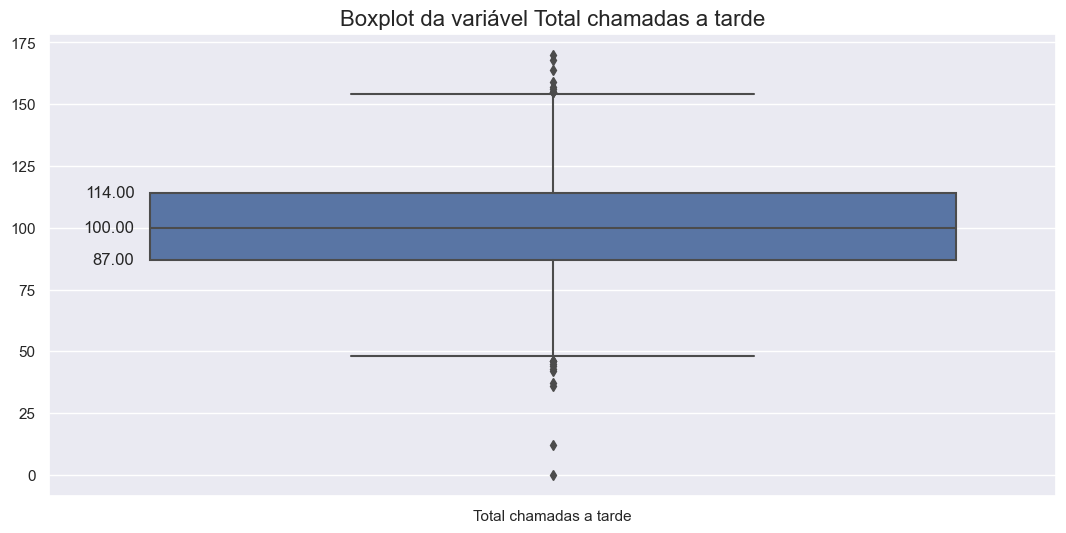

Resumo estatístico da variável Total carga a tarde
 count    3331.000000
mean       17.084890
std         4.309664
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: Total carga a tarde, dtype: float64


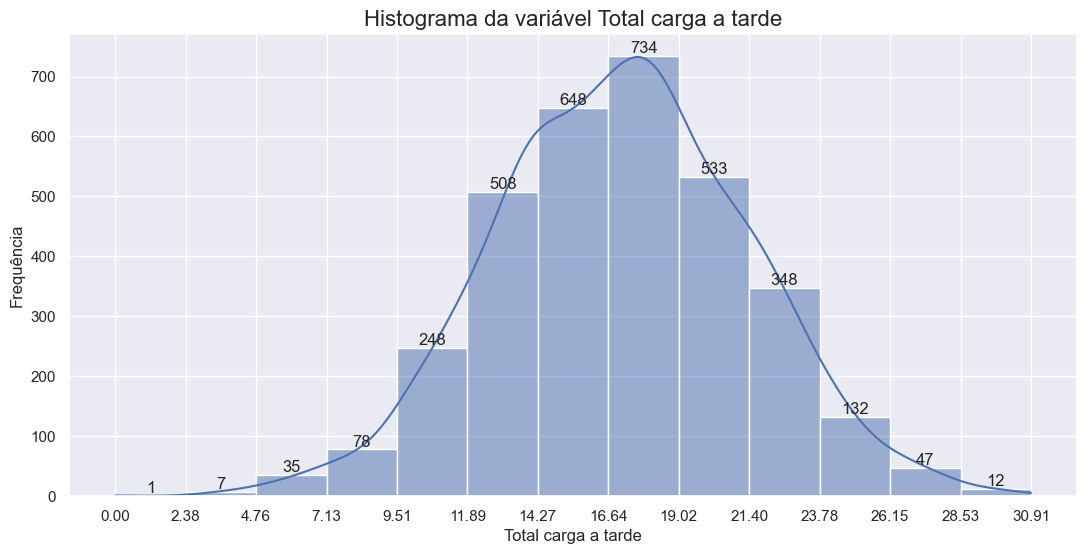

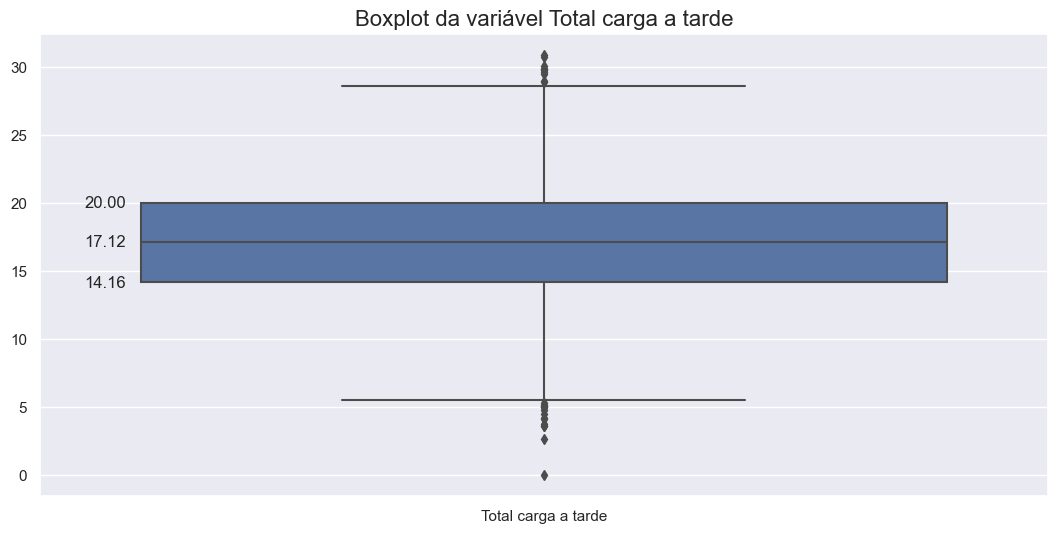

Resumo estatístico da variável Total minutos a noite
 count    3331.00000
mean      200.84293
std        50.57502
min        23.20000
25%       167.00000
50%       201.10000
75%       235.30000
max       395.00000
Name: Total minutos a noite, dtype: float64


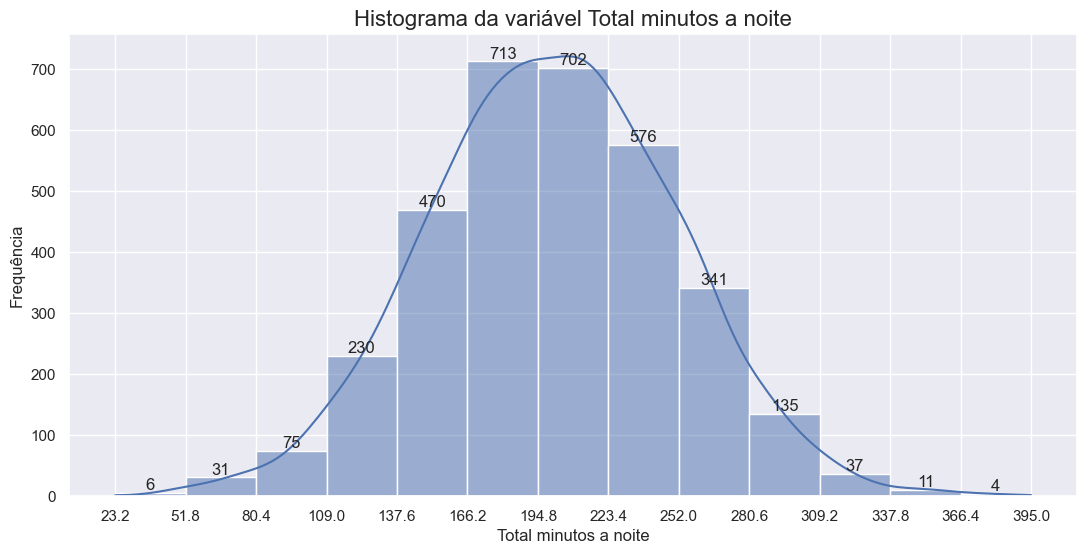

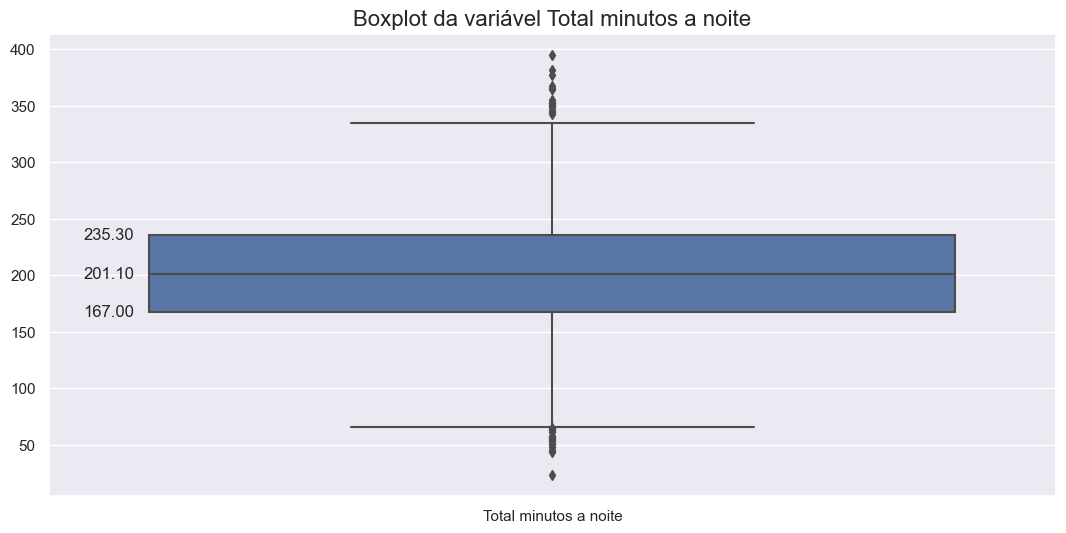

Resumo estatístico da variável Total chamadas a noite
 count    3331.000000
mean      100.104173
std        19.559203
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: Total chamadas a noite, dtype: float64


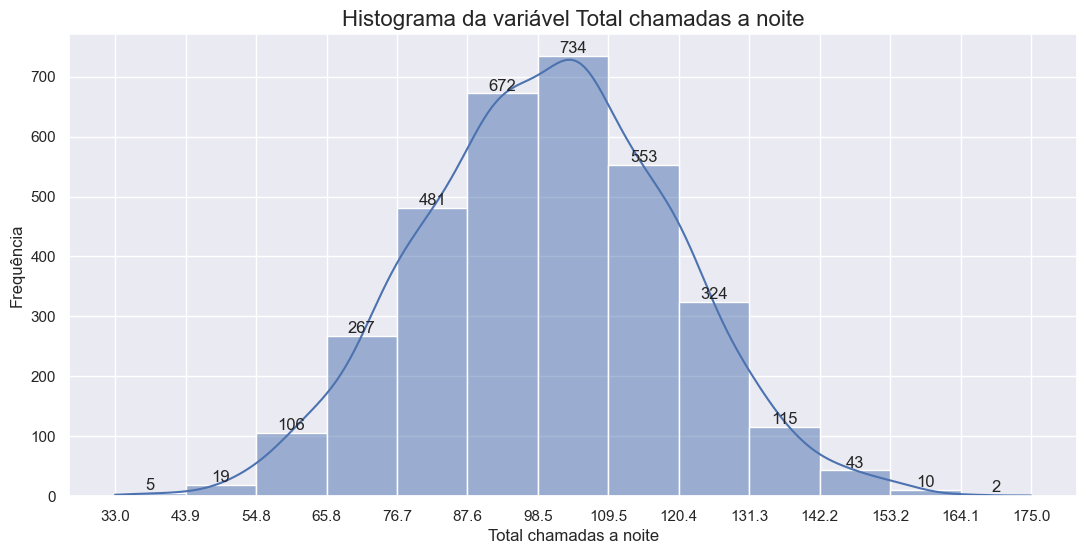

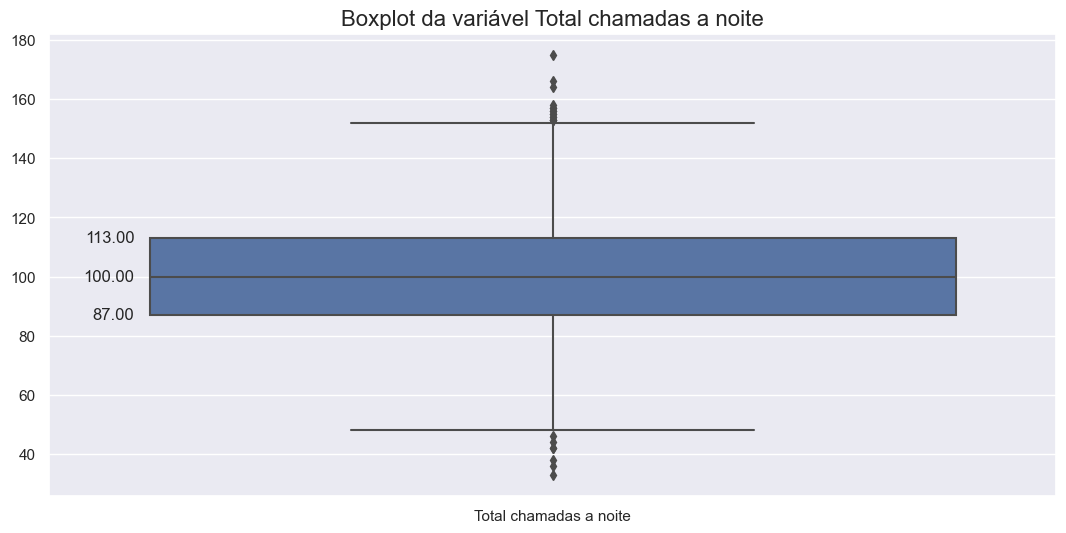

Resumo estatístico da variável Total carga a noite
 count    3331.000000
mean        9.038016
std         2.275926
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: Total carga a noite, dtype: float64


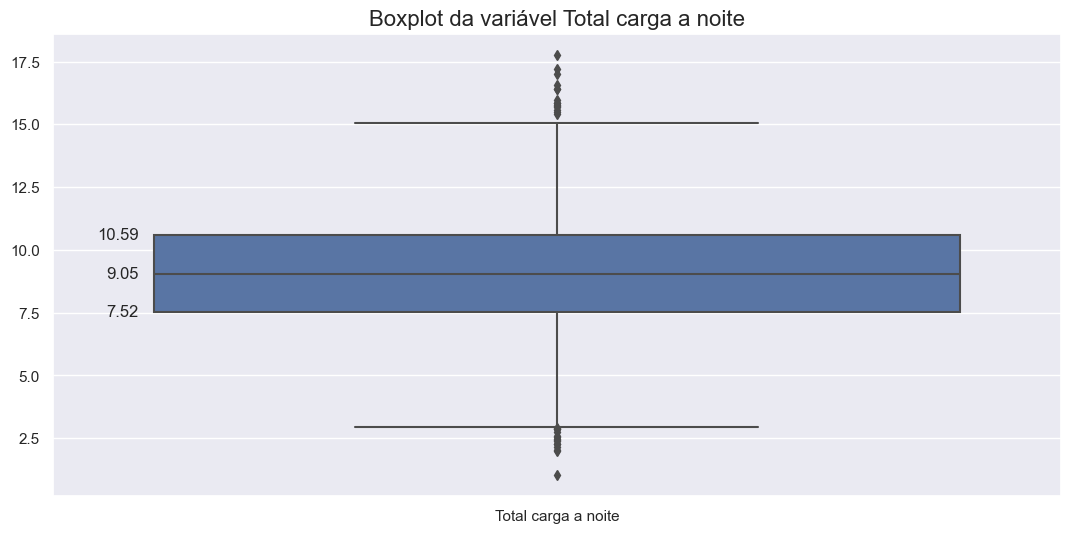

Resumo estatístico da variável Total minutos internacionais
 count    3331.000000
mean       10.235965
std         2.791215
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: Total minutos internacionais, dtype: float64


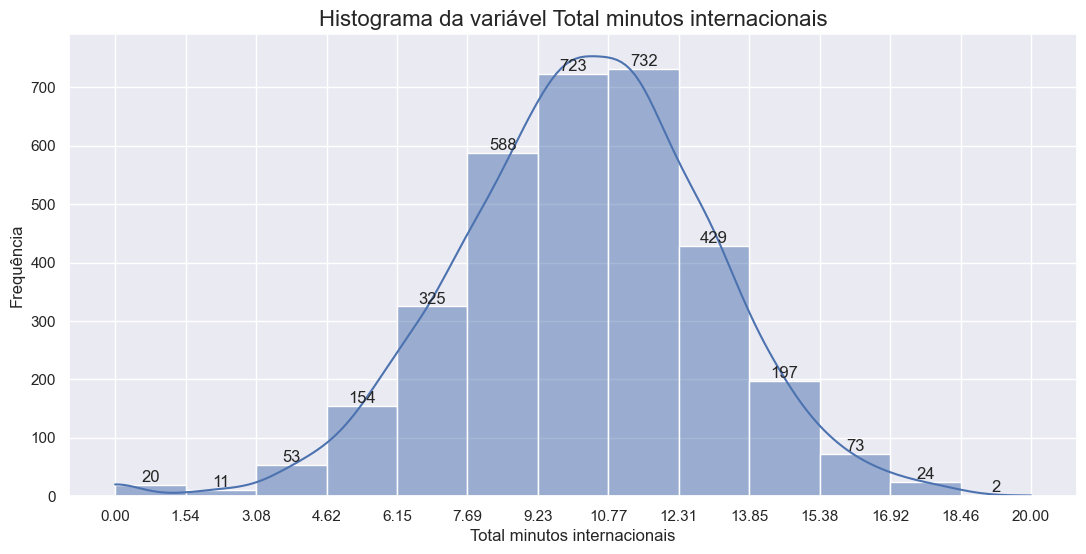

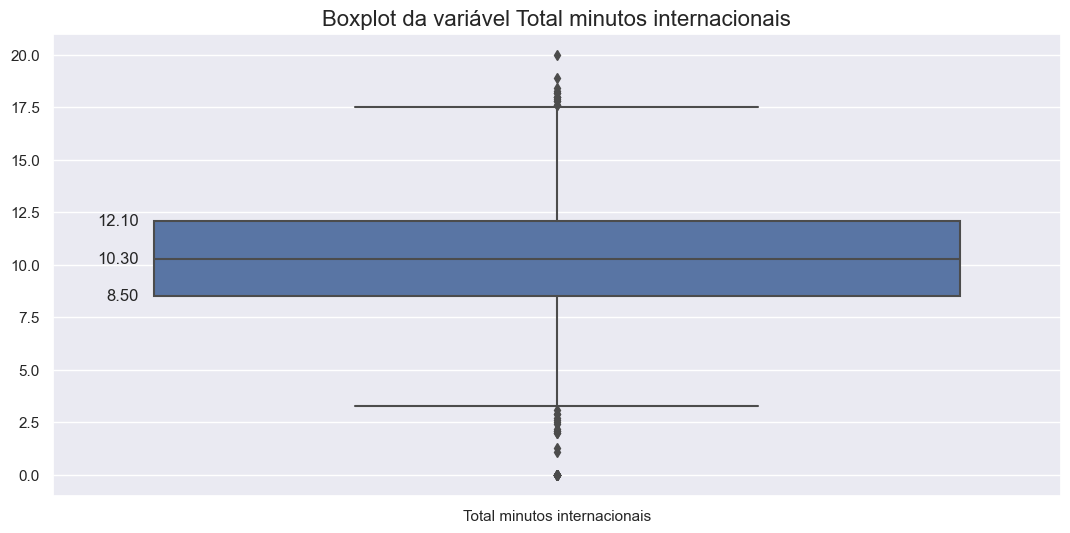

Resumo estatístico da variável Total chamadas internacionais
 count    3331.000000
mean        4.480636
std         2.461200
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total chamadas internacionais, dtype: float64


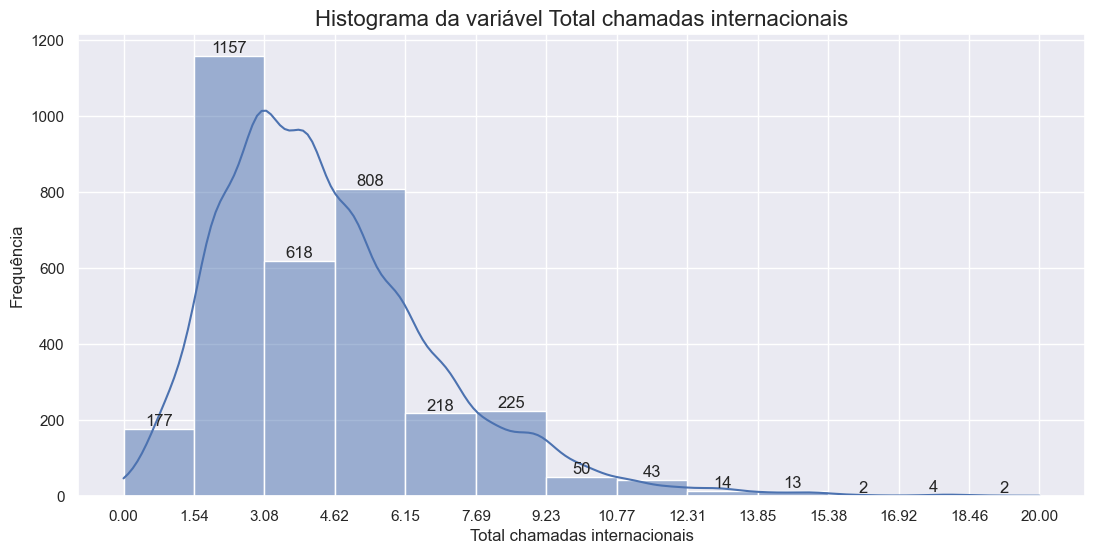

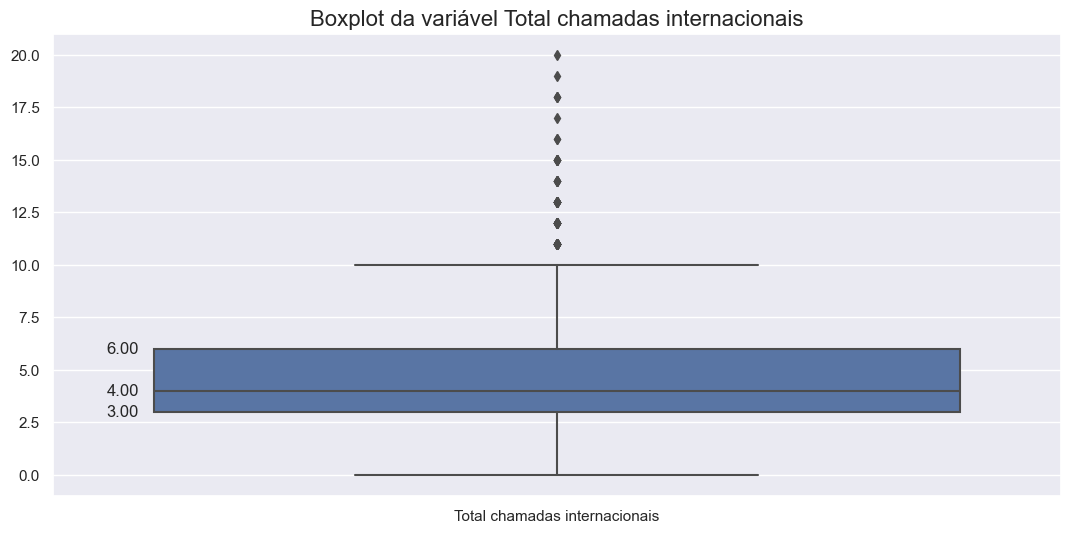

Resumo estatístico da variável Total carga internacional
 count    3331.000000
mean        2.764221
std         0.753603
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: Total carga internacional, dtype: float64


Resumo estatístico da variável Numero chamadas atendimento ao cliente
 count    3331.000000
mean        1.562594
std         1.314929
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Numero chamadas atendimento ao cliente, dtype: float64


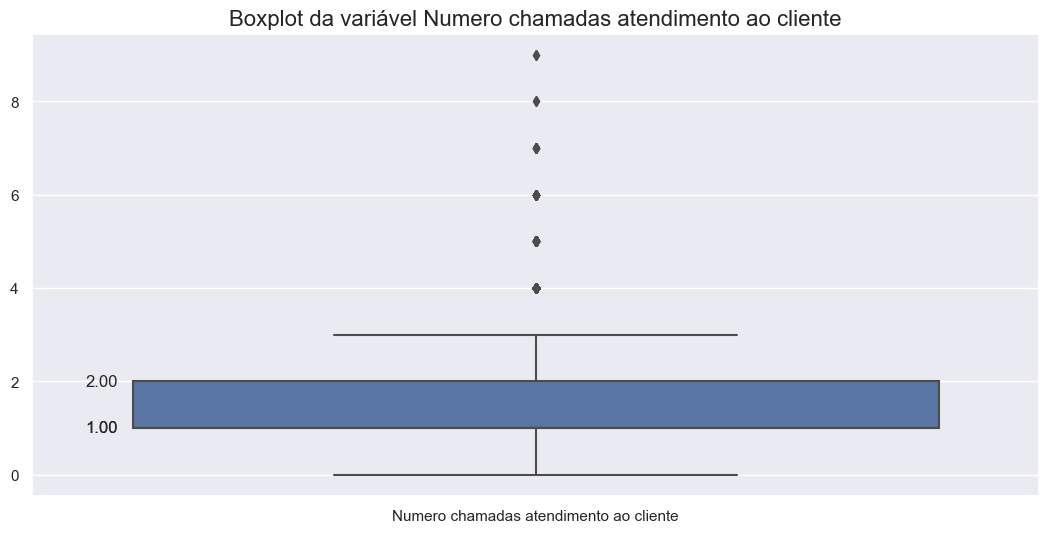

In [22]:
# Loop que percorre todas as colunas
# A notação de slicing [0:19] é para não incluir a variável alvo
for k in df.columns[0:19]:
    # Verifica se a coluna não possui valores do tipo texto
    if df[k].dtypes != object:
        
        # Sumário estatístico
        print("Resumo estatístico da variável " + k + "\n", df[k].describe())
        
        # Histograma
        desenhaHistograma(df[k], k)
        
        # Boxplot
        desenhaBoxplot(df[k], k)

##### 4.5.4 Análise descritiva das variáveis Categóricas

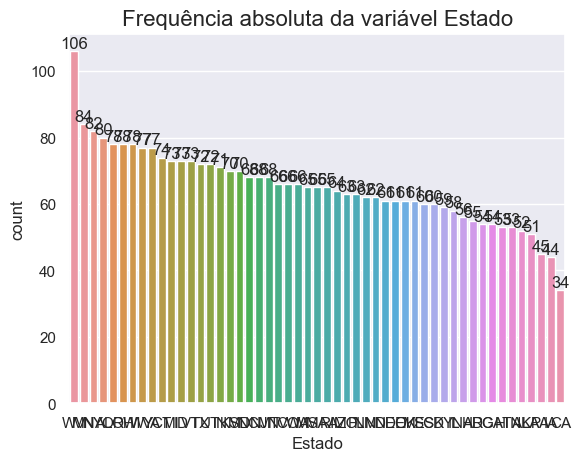

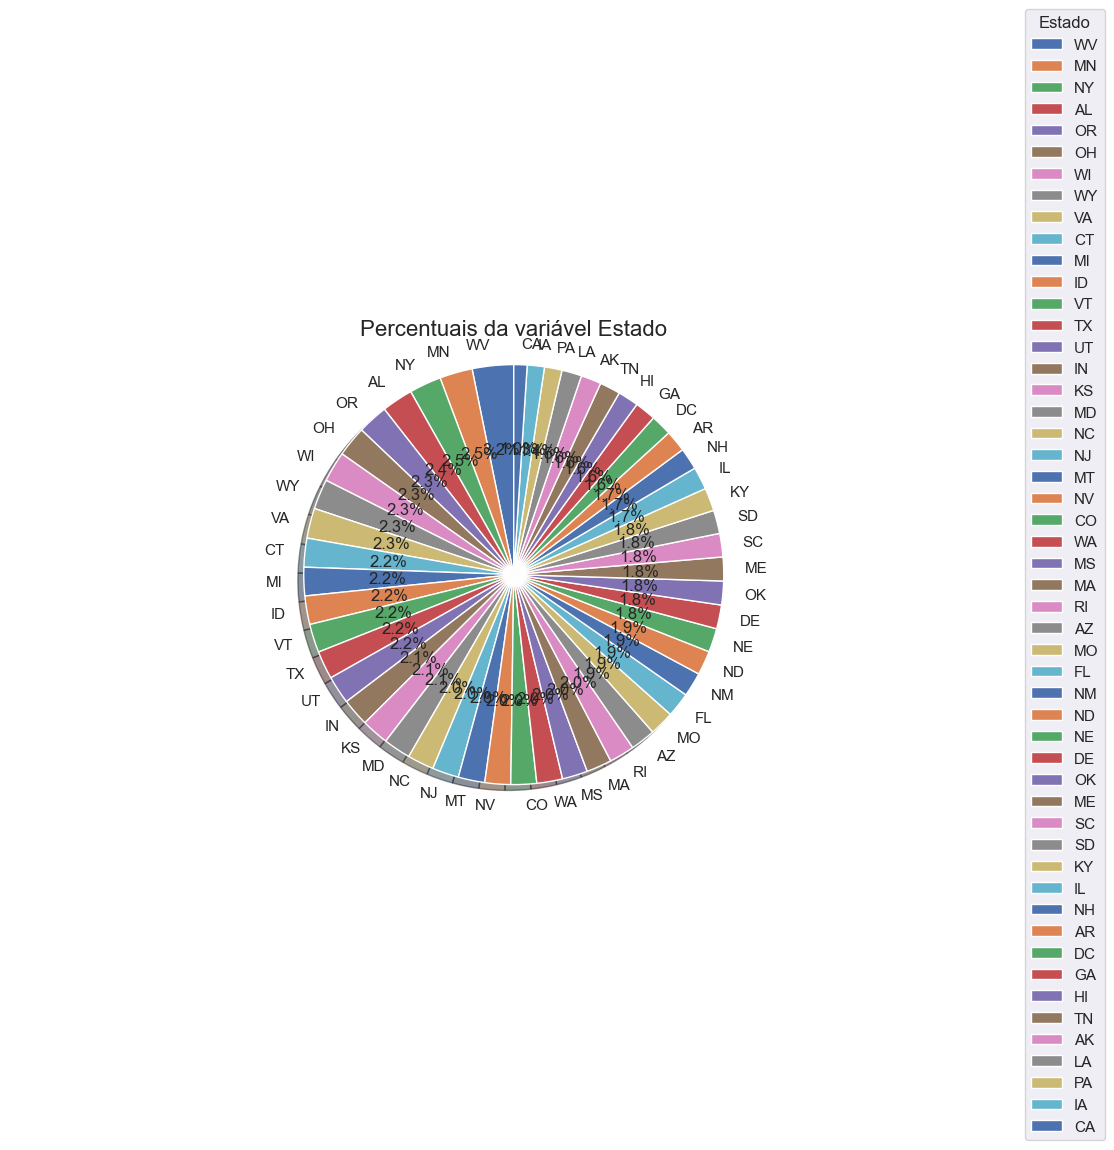

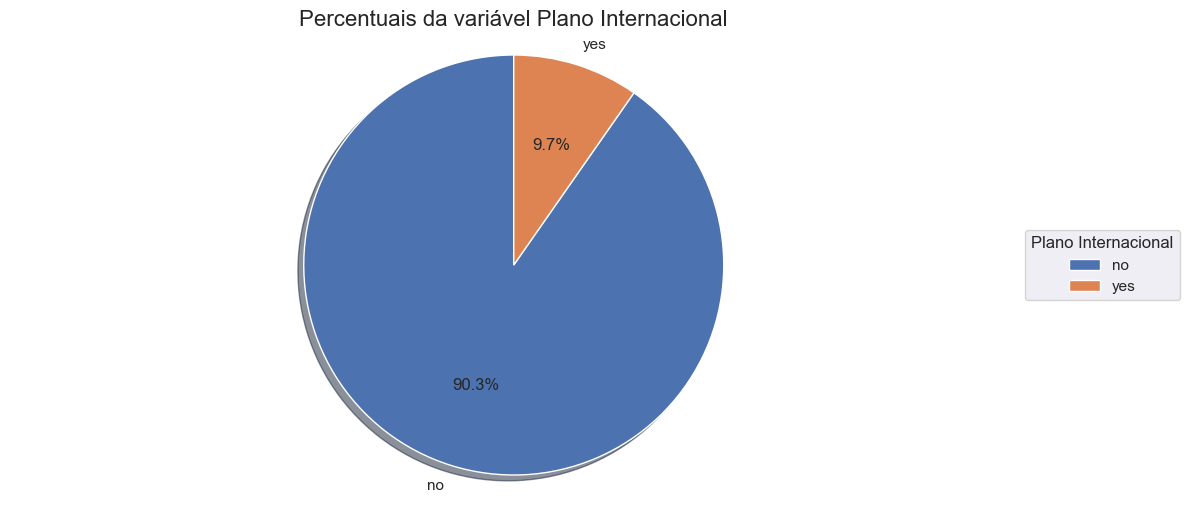

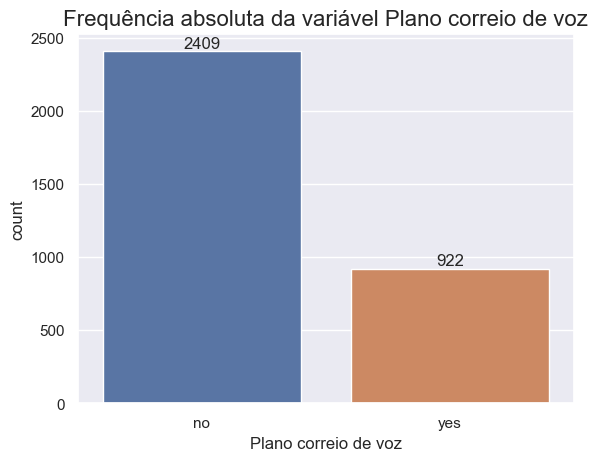

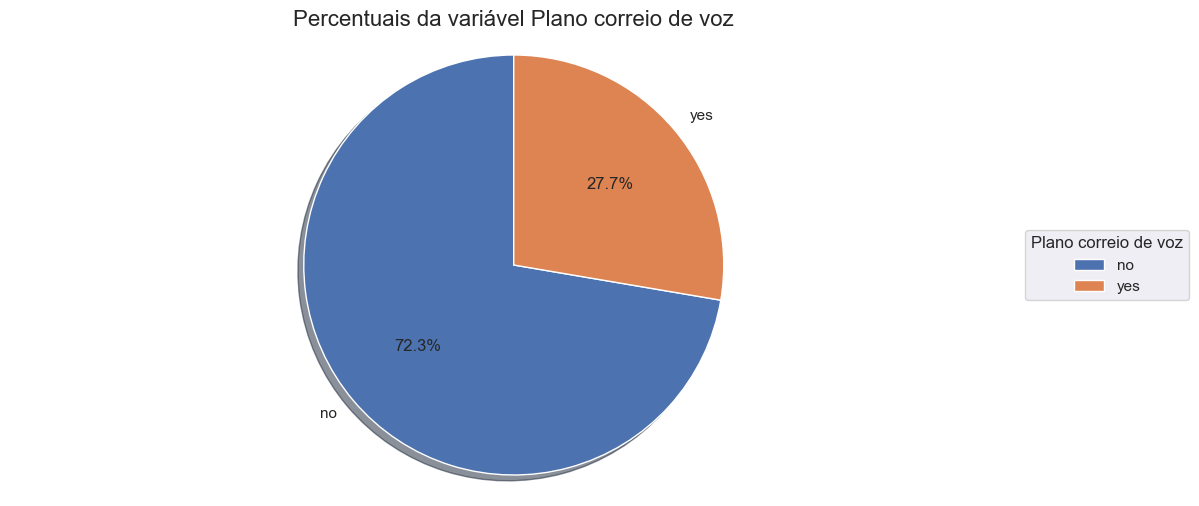

In [23]:
# Loop que percorre todas as colunas
for k in df.columns[0:19]:
    # Verifica se a coluna possui valores do tipo texto
    if df[k].dtypes == object:
        
        # Frequência absoluta 
        desenhaCountPlot(df[k], k)
        
        # Percentuais
        desenhaPizza(df[k], k)       

###### 4.5.4.1 Análise descritiva da variável alvo

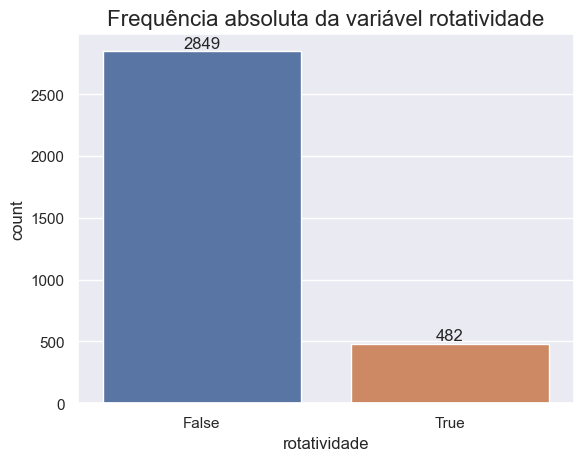

In [24]:
# Frequência absoluta 
desenhaCountPlot(df[variavelAlvo], variavelAlvo)

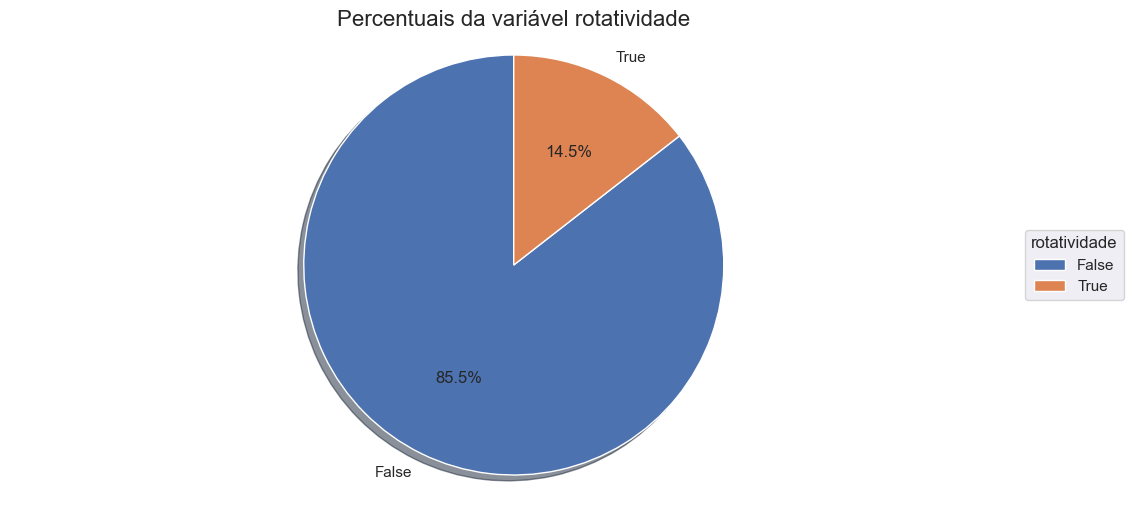

In [25]:
# Percentuais
desenhaPizza(df[variavelAlvo], variavelAlvo)

##### 4.5.5 - Correlação entre as variáveis

###### 4.5.5.1 - Matriz de correlação 

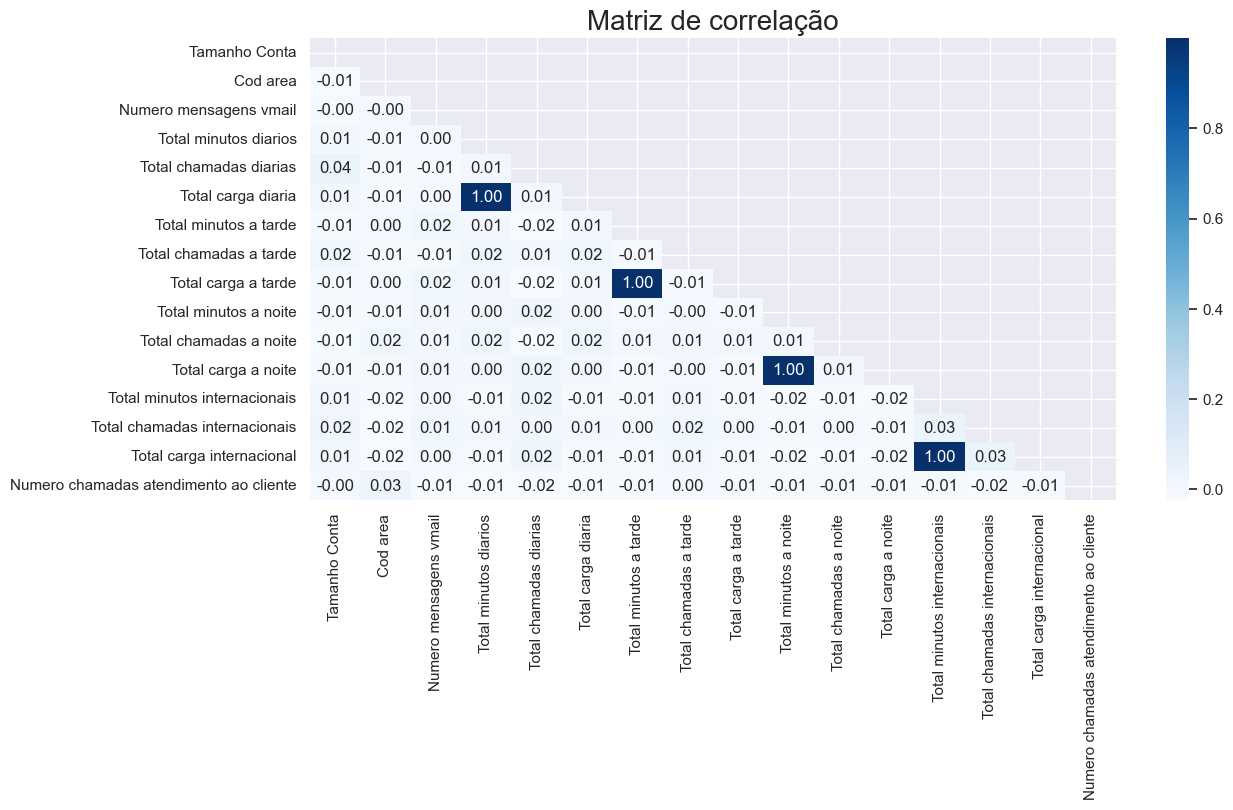

In [26]:
# Cria uma lista vazia
colunasQuantitativas = []

# Seleciona as variáveis quantitativas
for k in df.columns[0:19]:
    # Verifica se a coluna não possui valores do tipo texto
    if df[k].dtypes != object:
        colunasQuantitativas.append(k)

# Calculando a correlação 
correlacao = df[colunasQuantitativas].corr()

# Criando uma máscara
mascara = np.zeros_like(correlacao)

# Selecionando a matriz triangular inferior da máscara.
mascara[np.triu_indices_from(mascara)] = True

# A notação de slicing [0:19] é para não incluir a variável alvo
fig = plt.subplots(figsize=(13, 6))
sns.heatmap(data = correlacao,
            mask = mascara,
            annot = True,
            fmt = '.2f',
            cmap='Blues',
            )
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

###### 4.5.5.2 - Correlação entre a variável Total carga a tarde e a variável Total minutos a tarde

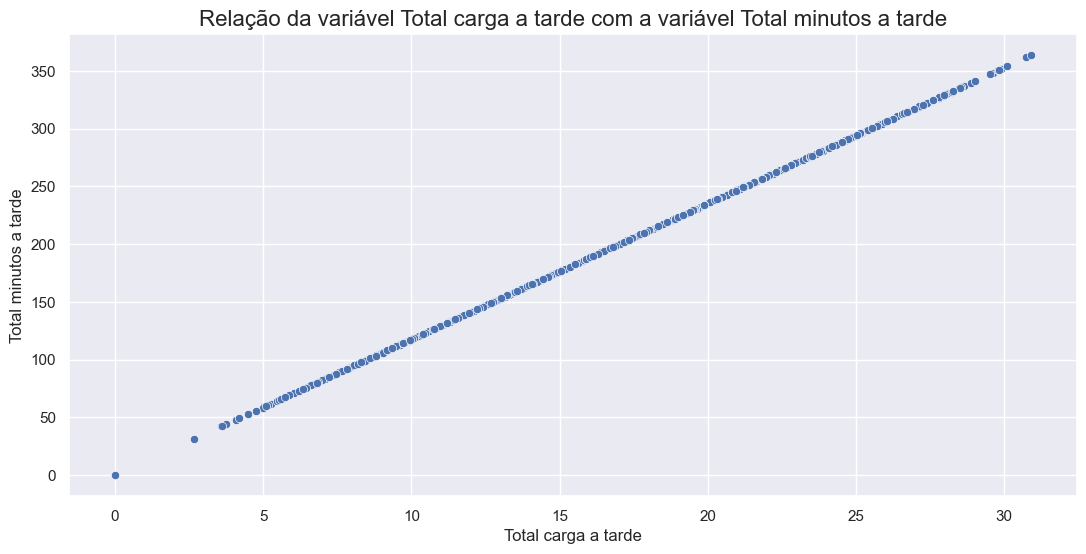

In [27]:
# ScatterPlot
desenhaScatterPlot(df["Total carga a tarde"], df["Total minutos a tarde"], "Total carga a tarde","Total minutos a tarde" )

###### 4.5.5.3 - Analisar os dados setando a variável variavel alvo como índice

###### a) Analisando as variáveis quantitativas de acordo com a variável alvo

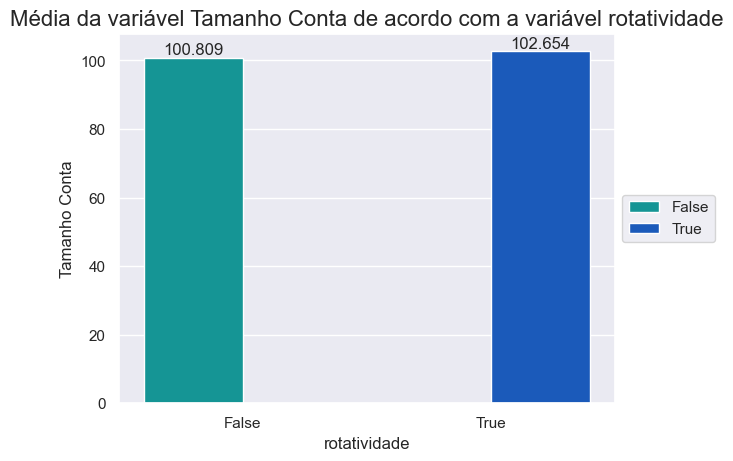

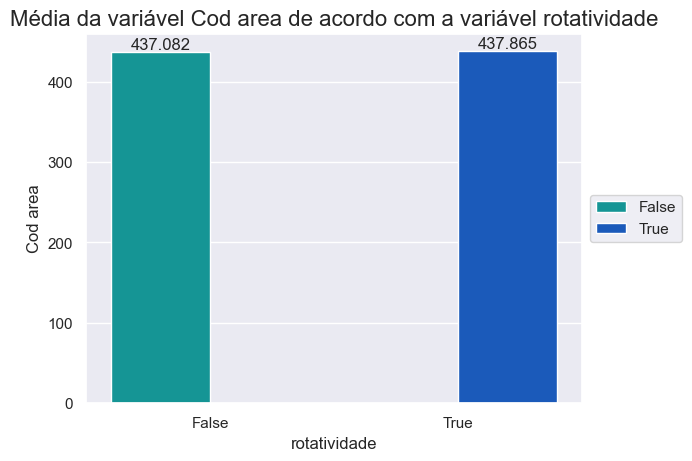

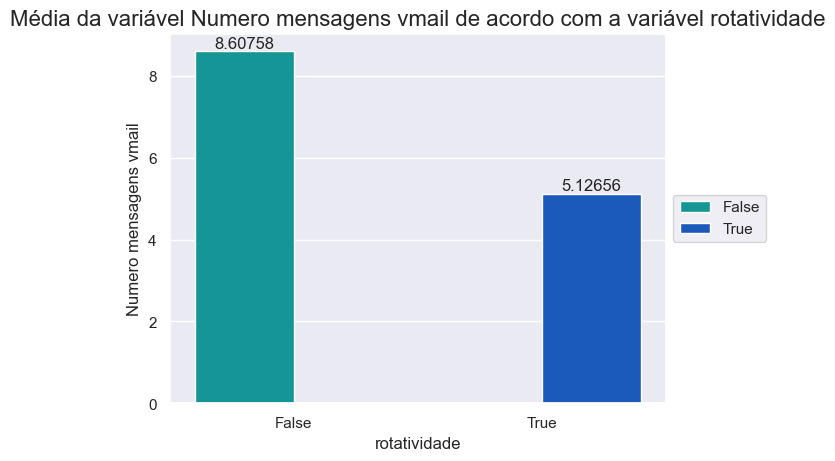

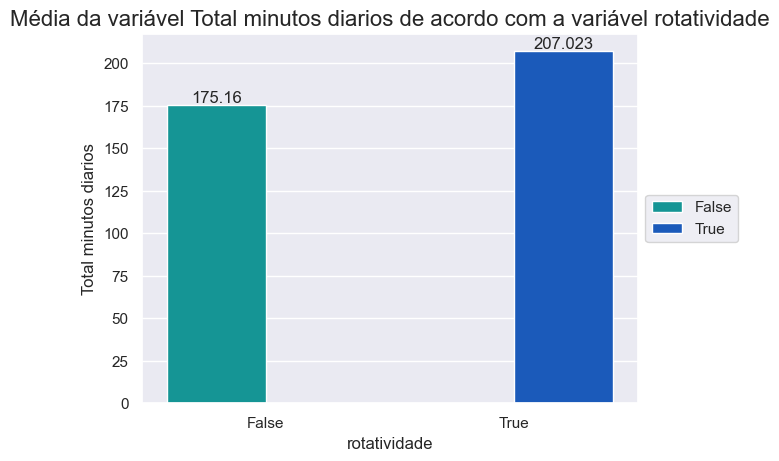

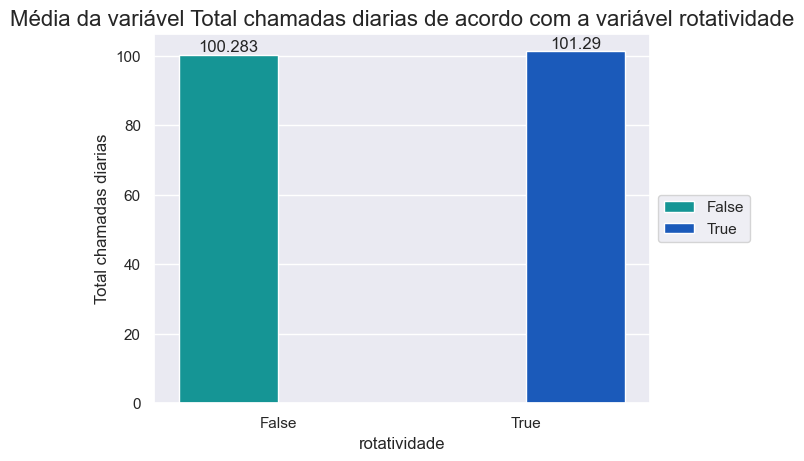

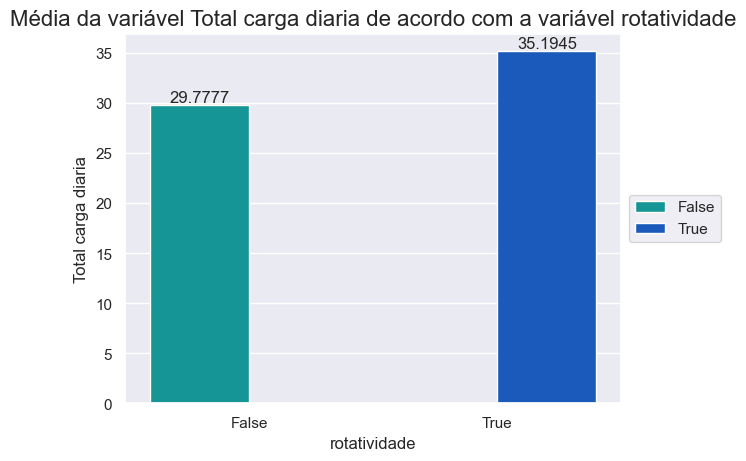

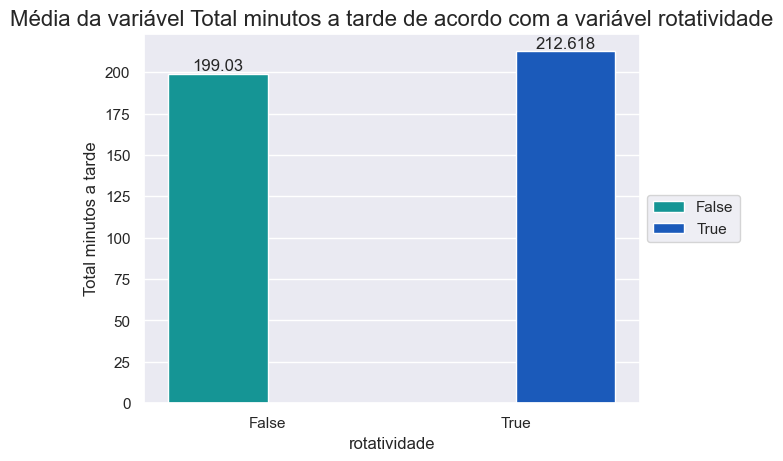

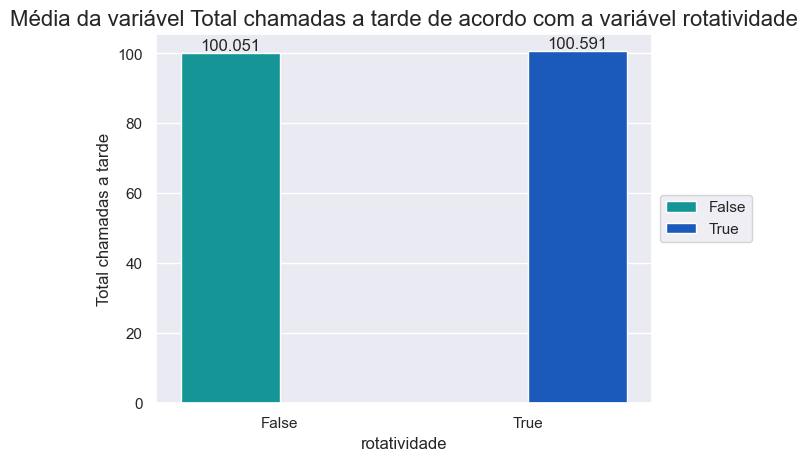

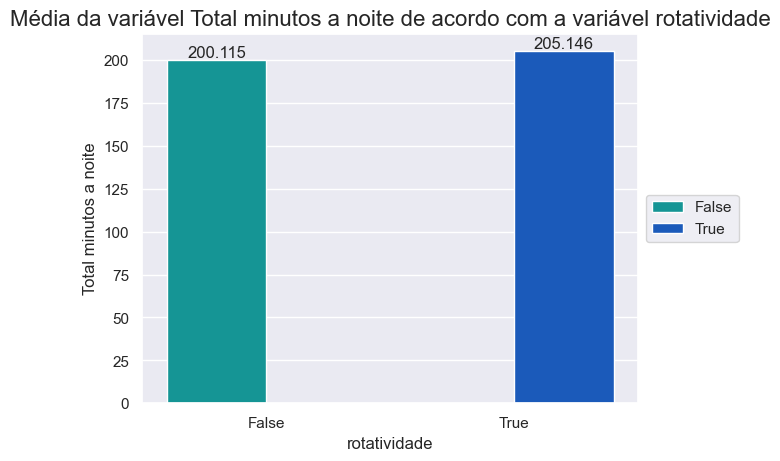

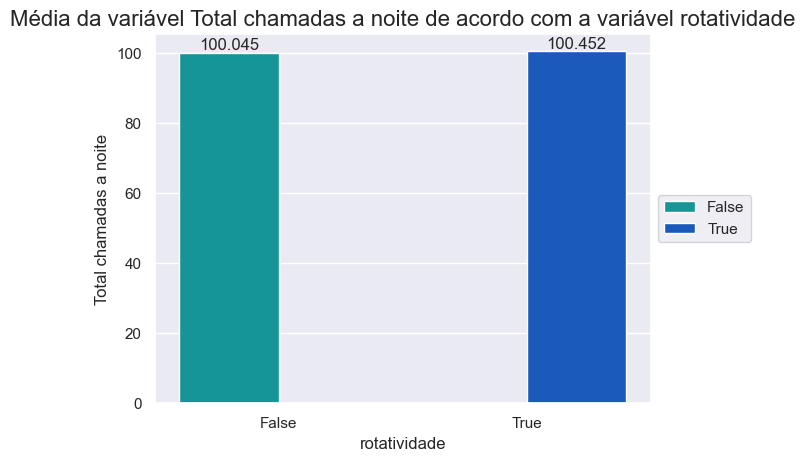

In [28]:
for k in colunasQuantitativas:
    # Desenhando o gráfico
    ax = sns.barplot(x=df.rotatividade, y=df[k], hue=df.rotatividade, palette="winter_r", ci=None)
    ax.set_title("Média da variável " + k + " de acordo com a variável " + variavelAlvo , fontsize = 16)
    ax.legend(loc="center left", bbox_to_anchor=(1., 0., 0.5, 1.)) # exibe a legenda
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Analisando as variáveis categóricas de acordo com a variável alvo

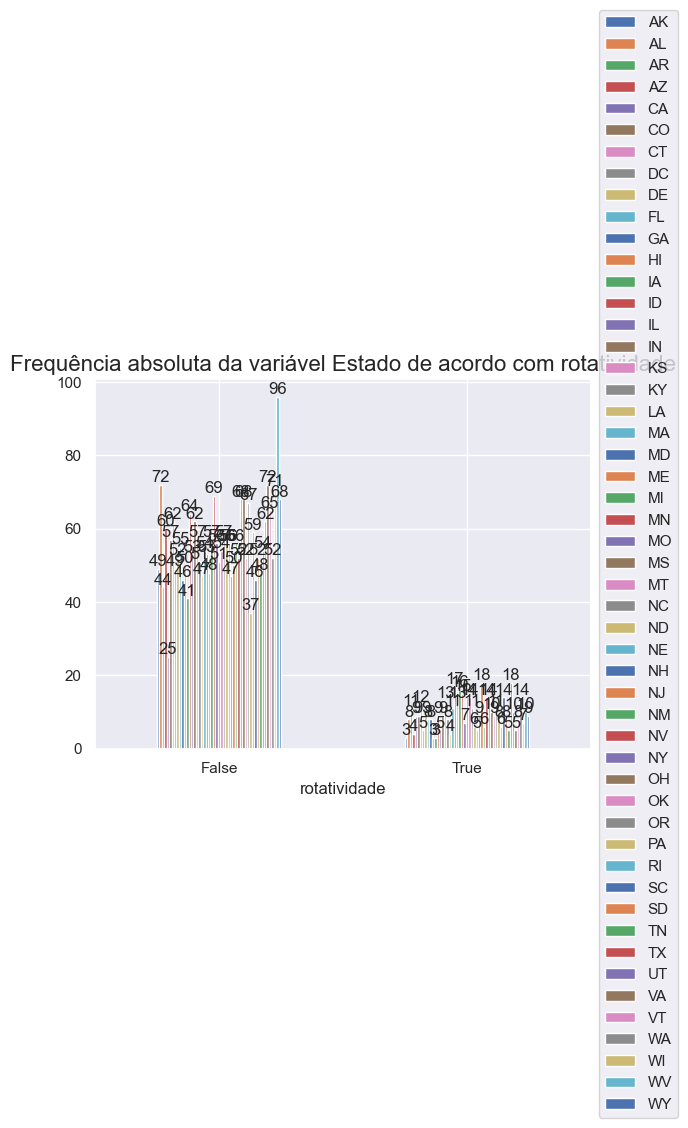

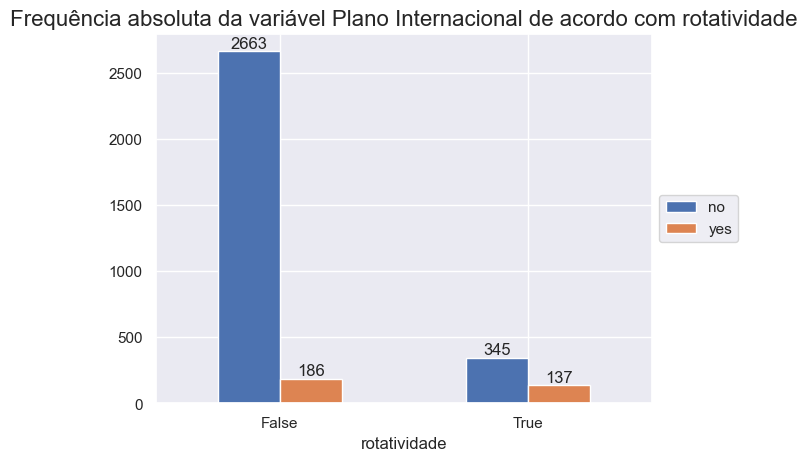

In [29]:
# Loop que percorre todas as colunas
# A notação de slicing [0:19] é para não incluir a variável alvo
for k in df.columns[0:19]:
    
    # Verifica se a coluna possui valores do tipo texto
    if df[k].dtype == object:
        desenhaClassificacaoCruzada(df[k], k)

## 5 - Transformando os dados

In [30]:
# Faz uma cópia do dataframe
df2 = df.copy()

### 5.1 Tratando valores iguais a zero

In [31]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
# A notação de slicing [0:9] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:9]:
    
    # Verifica se os valores não são do tipo texto
    if df2[k].dtype != object:
        
        # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
        print(k + ":", len(df2[df2[k] == 0]))

Tamanho Conta: 0
Cod area: 0
Numero mensagens vmail: 2409
Total minutos diarios: 2
Total chamadas diarias: 2
Total carga diaria: 2


In [ ]:
# Substituindo os valores iguais a zero
# Cria uma lista com as colunas que terão os valores iguais a zero substituídos
colunasComValoresZero = ["Idade", "Montante de credito", "Duracao"]

# Loop que percorre todas as colunas
for k in colunasComValoresZero:
    
    # Calcula o valor da mediana da coluna
    mediana = df2[k].median()
    
    # Pesquisa as linhas com valores iguais a zero e atribui à variável linhasComValoresZero
    linhasComValoresZero = df2[df2[k] == 0]
    
    # Loop que percorre as linhas com valores iguais a zero
    for j in linhasComValoresZero.index:
        
        # Substitui a célula com valor outlier pela mediana
        df2[k] = df2[k].replace(df2.iloc[j][k], mediana)      

### 5.2 - Identificando e tratando valores outliers

In [32]:
# Loop que percorre todas as colunas
# A notação de slicing [0:19] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:19]:
    
    # Verifica se os valores da coluna não são do tipo texto
    if df2[k].dtype != object:
       
        # Calculando o zscore da coluna
        zscore = (df2[k] - df2[k].mean()) / df2[k].std()
        
        # Pesquisando valores menores que -3 ou maiores que 3 que são considerados outliers
        outliers = zscore[(zscore < -3) | (zscore > 3)]
        
        # Calculando o limite superior
        limiteSuperior = df2[k].mean() + 3 * df2[k].std()

        # Calculando o limite inferior
        limiteInferior = df2[k].mean() - 3 * df2[k].std()
        
        # Verifica se há outliers na coluna 
        if len(outliers) > 0:
            
            # Calcula a média da coluna, excluindo os valores outliers
            media = df2[k][(df[k] > limiteInferior) & (df2[k] <= limiteSuperior)].mean()
            
            # Cria uma lista vazia para armazenar as linhas com outliers
            linhasComOutlier = []
             
            # Loop que percorre as linhas com outliers
            for j in outliers.index:
                
                # Substitui a célula com valor outlier pela média
                df2[k] = df2[k].replace(df2.iloc[j][k], media)
                
                # Adiciona o índice da linha na lista
                linhasComOutlier.append(j)
                
            print("- Quantidade de valores outliers " + "da variável " + k + " substituídos pela média"  + ":", len(outliers))
            print("- Linha (as) da variável " + k + " que foi (foram) alterada (as):", linhasComOutlier)    

- Quantidade de valores outliers da variável Tamanho Conta substituídos pela média: 7
- Linha (as) da variável Tamanho Conta que foi (foram) alterada (as): [416, 817, 1407, 1550, 1750, 1885, 3214]
- Quantidade de valores outliers da variável Numero mensagens vmail substituídos pela média: 3
- Linha (as) da variável Numero mensagens vmail que foi (foram) alterada (as): [845, 2715, 2886]
- Quantidade de valores outliers da variável Total minutos diarios substituídos pela média: 9
- Linha (as) da variável Total minutos diarios que foi (foram) alterada (as): [365, 985, 1052, 1344, 1396, 1985, 2593, 2735, 2752]
- Quantidade de valores outliers da variável Total chamadas diarias substituídos pela média: 9
- Linha (as) da variável Total chamadas diarias que foi (foram) alterada (as): [468, 692, 740, 1120, 1143, 1344, 1396, 1988, 3185]
- Quantidade de valores outliers da variável Total carga diaria substituídos pela média: 9
- Linha (as) da variável Total carga diaria que foi (foram) alterada 

### 5.3 - Convertendo variáveis categóricas em números

#### 5.3.1 Convertendo a variável alvo de texto para número

In [33]:
# Verificando o tipo de dado de uma coluna
df2.rotatividade.dtype

dtype('bool')

In [ ]:
# LabelEncoder deve ser usado somente na variável alvo. 
# Para variáveis preditoras deve ser utilizada a função OneHotEncoder ou pd.get_dummies(df).

# Cria o objeto encoder
encoder = LabelEncoder()

# Cria uma nova coluna com a variável alvo com valores numéricos
df2[variavelAlvo] = encoder.fit_transform(df2[variavelAlvo])
df2.head()

#### 5.3.2 Convertendo as variáveis preditoras de texto para número

In [34]:
# Verificando a quantidade de valores únicos de uma coluna
df2.Estado.nunique()

51

##### 5.3.2.1 Encoding com o Pandas

In [ ]:
df3 = pd.get_dummies(df2)
df3.head()

In [ ]:
# Visualizando o nome das colunas
df3.columns

In [ ]:
# Organizando o dataframe
valoresVariavelAlvo = df3[variavelAlvo]
df3.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df3[variavelAlvo] = valoresVariavelAlvo
df3.columns

##### 5.3.2.2 Encoding com o LabelEncoder

In [35]:
# Cria o objeto encoder
encoder = LabelEncoder()

# loop que percorre as colunas
for k in df2.columns[0:19]:
    
    # Verifica se os valores da coluna são do tipo texto
    if df2[k].dtype == object:
        df2[k] = encoder.fit_transform(df2[k])
df2.head()        

Estado  Tamanho Conta  Cod area  Plano Internacional  Plano correio de voz  \
0      16          128.0       415                    0                     1   
1      35          107.0       415                    0                     1   
2      31          137.0       415                    0                     0   
3      35           84.0       408                    1                     0   
4      36           75.0       415                    1                     0   

   Numero mensagens vmail  Total minutos diarios  Total chamadas diarias  \
0                    25.0                  265.1                   110.0   
1                    26.0                  161.6                   123.0   
2                     0.0                  243.4                   114.0   
3                     0.0                  299.4                    71.0   
4                     0.0                  166.7                   113.0   

   Total carga diaria  Total minutos a tarde  Total chamadas a tarde  \
0               45.07                  197.4                    99.0   
1               27.47                  195.5                   103.0   
2               41.38                  121.2                   110.0   
3               50.90                   61.9                    88.0   
4               28.34                  148.3                   122.0   

   Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
0                16.78                  244.7                    91.0   
1                16.62                  254.4                   103.0   
2                10.30                  162.6                   104.0   
3                 5.26                  196.9                    89.0   
4                12.61                  186.9                   121.0   

   Total carga a noite  Total minutos internacionais  \
0                11.01                          10.0   
1                11.45                          13.7   
2                 7.32                          12.2   
3                 8.86                           6.6   
4                 8.41                          10.1   

   Total chamadas internacionais  Total carga internacional  \
0                            3.0                       2.70   
1                            3.0                       3.70   
2                            5.0                       3.29   
3                            7.0                       1.78   
4                            3.0                       2.73   

   Numero chamadas atendimento ao cliente  rotatividade  
0                                     1.0         False  
1                                     1.0         False  
2                                     0.0         False  
3                                     2.0         False  
4                                     3.0         False

## 6 - Dividindo os dados em treino e teste

In [36]:
# Fazendo uma cópia do dataframa
dfDados = df2.copy()

In [37]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:19] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:19]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [38]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaAcertos = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = LogisticRegression()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaAcertos.append(accuracy_score(Yteste, previsoes, normalize=False))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'Acertos':listaAcertos})
melhorRandomState = resultados[resultados['Acertos'] == resultados['Acertos'].max()]
melhorRandomState

random_state  Acertos
79            80      591

In [39]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 7 - Seleção de variáveis

### 7.1 - Selecionado as melhores variáveis com o Random Forest Classifier

In [40]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(random_state=0)

# Treinando o modelo
randomForestClassifier.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = randomForestClassifier.feature_importances_, index = dfDados.columns[0:19])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Níveis de importância das variáveis - Random Forest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.2 - Selecionado as melhores variáveis com o SelectKBest

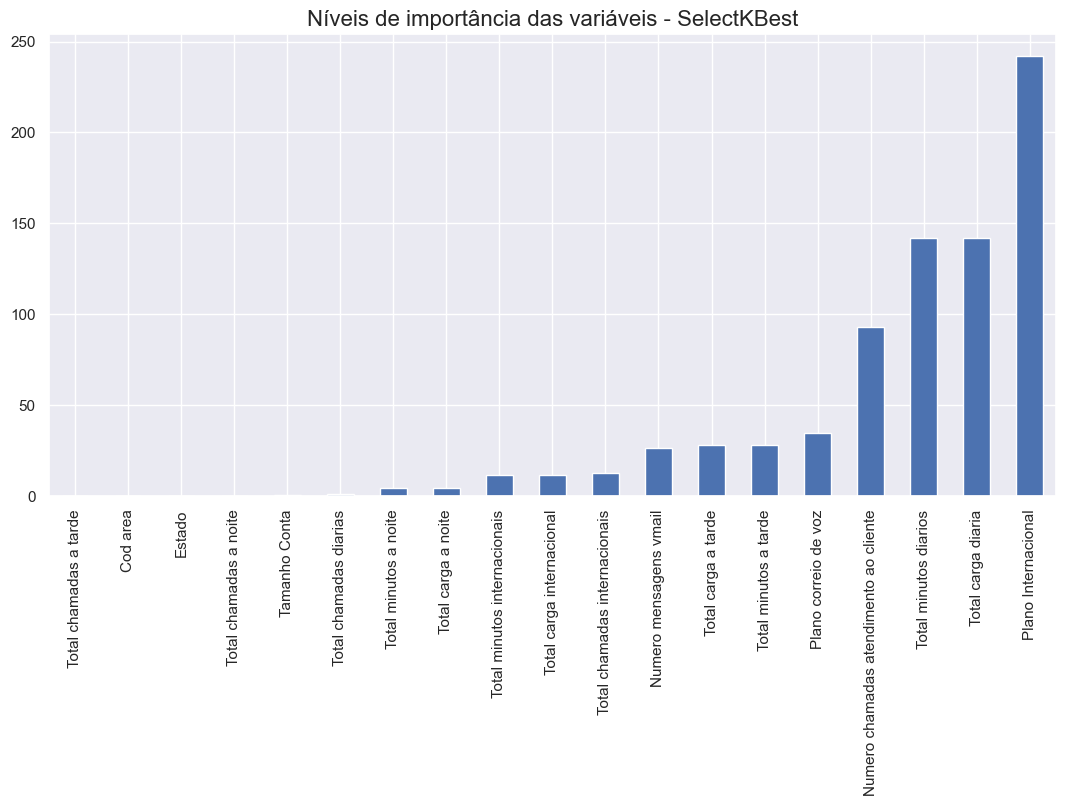

In [41]:
# Cria o objeto SelectKBest
selectkBest = SelectKBest(k = 4)

# Executa a função em (X, y) e obtém as variáveis selecionadas
selectkBestTreinado = selectkBest.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = selectkBestTreinado.scores_, index = dfDados.columns[0:19])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Níveis de importância das variáveis - SelectKBest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.3 - Selecionado as melhores variáveis com Eliminação Recursiva de Atributos RFE 

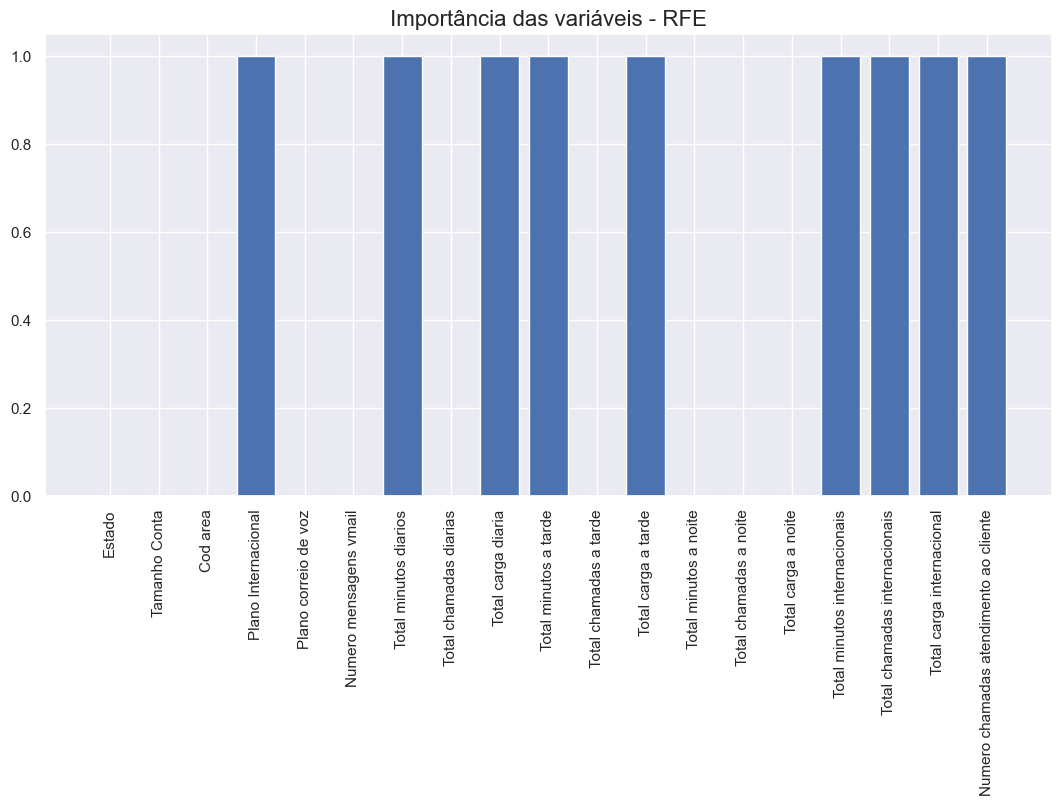

In [42]:
# Criando o modelo
extraTreeClassifier = ExtraTreeClassifier(random_state=0)

# Treinando o modelo
extraTreeClassifier.fit(X, y)

# Criando Eliminação Recursiva de Atributos RFE
eliminacaoRecursiva = RFE(extraTreeClassifier)

# Treinando Eliminação Recursiva de Atributos RFE
eliminacaoRecursivaTreinada = eliminacaoRecursiva.fit(X, y)

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
plt.title("Importância das variáveis - RFE", fontsize = 16)
# A notação de slicing [0:19] é para não incluir a variável alvo
plt.bar(dfDados.columns[0:19], eliminacaoRecursivaTreinada.support_)
plt.xticks(rotation=90)
plt.show()

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [43]:
# Variáveis selecionadas
variaveisSelecionadas = ['Tamanho Conta', 'Plano Internacional', 'Total minutos diarios', 'Total chamadas diarias', 'Total carga diaria',
       'Total minutos a tarde', 'Total chamadas a tarde', 'Total carga a tarde', 'Total minutos a noite', 'Total chamadas a noite', 'Total carga a noite',
       'Total minutos internacionais', 'Total chamadas internacionais', 'Total carga internacional', 'Numero chamadas atendimento ao cliente',]

In [44]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [45]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 100
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaAcertos = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = LogisticRegression()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaAcertos.append(accuracy_score(Yteste, previsoes, normalize=False))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'Acertos':listaAcertos})
melhorRandomState = resultados[resultados['Acertos'] == resultados['Acertos'].max()]
melhorRandomState

random_state  Acertos
130           131      588

In [46]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 9 - Balanceamento de classes

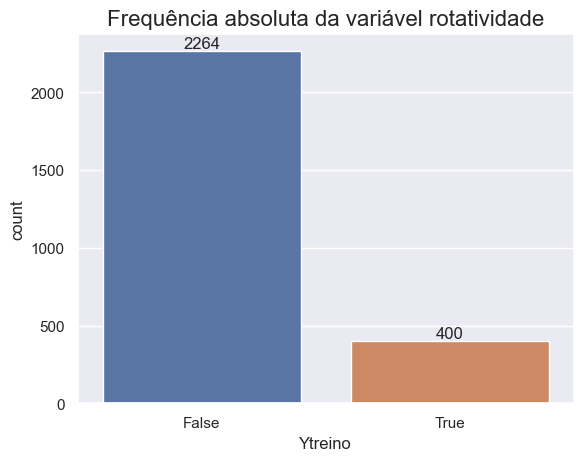

In [47]:
# Criando DataFrame de Ytreino
# Criamos este DataFrame porque a função desenhaCountPlot espera receber uma coluna de um DataFrame
dfYtreino = pd.DataFrame(Ytreino, columns=["Ytreino"])
dfYtreino

# Countplot da variável alvo no DATASET DE TREINO
desenhaCountPlot(dfYtreino.Ytreino, variavelAlvo)

### 9.1 - Oversampling

In [48]:
# Criando o objeto do tipo SMOTE. 
# O parâmetro k_neighbors indica quantos vizinhos serão considerados para fazer o oversampling.
overSampler = SMOTE(k_neighbors = 3, random_state=167)

# Aplicando o oversampling 
Xtreino, Ytreino = overSampler.fit_resample(Xtreino, Ytreino)

### 9.2 - Undersampling

In [ ]:
# Criando o objeto do tipo RandomUnderSampler
underSampler = RandomUnderSampler(random_state=167)

# Fazendo o undersampling
Xtreino, Ytreino = underSampler.fit_resample(Xtreino, Ytreino)

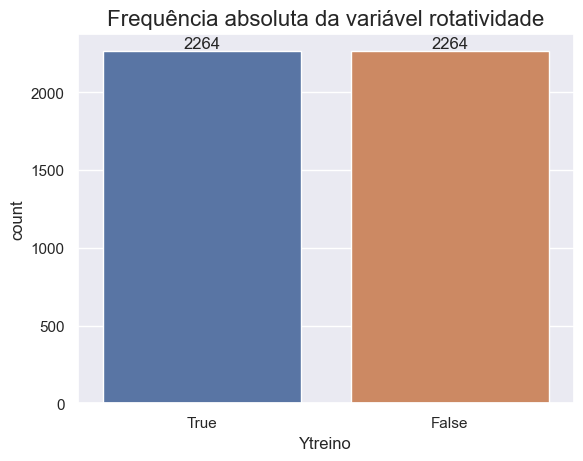

In [49]:
# Criando DataFrame de Ytreino
# Criamos este DataFrame porque a função desenhaCountPlot espera receber uma coluna de um DataFrame
dfYtreino = pd.DataFrame(Ytreino, columns=["Ytreino"])
dfYtreino

# Countplot da variável alvo no DATASET DE TREINO
desenhaCountPlot(dfYtreino.Ytreino, variavelAlvo)

## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [50]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## 11 - Criando os modelos de classificação

In [51]:
# DataFrame para comparar a acurácia de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Regressão Logística", "Linear Discriminant Analysis", "KNN", "Naive Bayes", "Árvore de Decisão", "SVM", "Random Forest",
                                 "Bagging Classifier", "AdaBoost", "Voting Classifier", "Gradient Tree Boosting", "XGBoost"],
                   "Acurácia": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"],
                   "Acertos": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"],
                   "Erros": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"]}
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística        -       -     -
1   Linear Discriminant Analysis        -       -     -
2                            KNN        -       -     -
3                    Naive Bayes        -       -     -
4              Árvore de Decisão        -       -     -
5                            SVM        -       -     -
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.1 - Regressão Logística

In [52]:
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [0.001,0.01,0.1,1.0,10,100,1000]
}

# Cria o modelo que desejamos testar os melhores parâmetros
regressaoLogistica = LogisticRegression()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = regressaoLogistica, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosLR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosLR.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 85.770%
Melhores parâmetros para o modelo: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}


In [53]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
regressaoLogistica = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])

# Treinamento do modelo
regressaoLogistica.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = regressaoLogistica.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 71.81%
Número de acertos: 479
Número de erros: 188


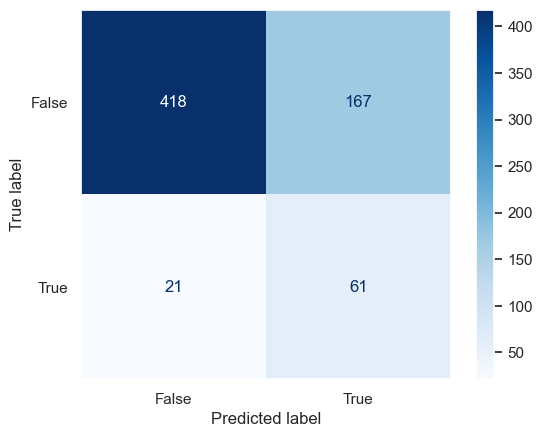

In [54]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, regressaoLogistica)

In [55]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[0,2] = numeroAcertos
dfComparaAlgoritmo.iloc[0,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis        -       -     -
2                            KNN        -       -     -
3                    Naive Bayes        -       -     -
4              Árvore de Decisão        -       -     -
5                            SVM        -       -     -
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.2 - Linear Discriminant Analysis

In [56]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "solver": ['svd', 'lsqr', 'eigen'],
    "shrinkage": [0.001,0.01,0.1,0.5,0.8,0.2]
}

# Cria o modelo que desejamos testar os melhores parâmetros
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = linearDiscriminantAnalysis, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 87.242%
Melhores parâmetros para o modelo: {'solver': 'eigen', 'shrinkage': 0.8}


In [57]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
linearDiscriminantAnalysis = LinearDiscriminantAnalysis(solver=melhoresParametros[0], shrinkage=melhoresParametros[1])

# Treinamento do modelo
linearDiscriminantAnalysis.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = linearDiscriminantAnalysis.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 64.32%
Número de acertos: 429
Número de erros: 238


In [58]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, linearDiscriminantAnalysis)

In [59]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[1,2] = numeroAcertos
dfComparaAlgoritmo.iloc[1,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN        -       -     -
3                    Naive Bayes        -       -     -
4              Árvore de Decisão        -       -     -
5                            SVM        -       -     -
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.3 - K-Nearest Neighbors - KNN

In [60]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute']
}

# Cria o modelo que desejamos testar os melhores parâmetros
kNeighborsClassifier = KNeighborsClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = kNeighborsClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 87.361%
Melhores parâmetros para o modelo: {'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'brute'}


In [61]:
# Criando o modelo
kNeighborsClassifier = KNeighborsClassifier(weights = melhoresParametros[0], n_neighbors = melhoresParametros[1], algorithm = melhoresParametros[2])

# Treinamento do modelo
kNeighborsClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = kNeighborsClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 67.02%
Número de acertos: 447
Número de erros: 220


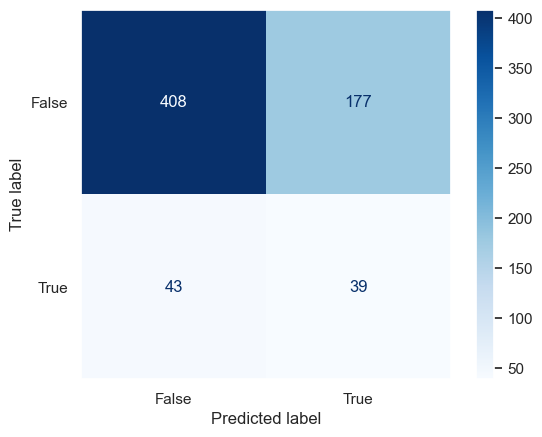

In [62]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, kNeighborsClassifier)

In [63]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[2,2] = numeroAcertos
dfComparaAlgoritmo.iloc[2,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes        -       -     -
4              Árvore de Decisão        -       -     -
5                            SVM        -       -     -
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.4 - Naive Bayes

In [64]:
# Criando o modelo
gaussianNB = GaussianNB()

# Treinamento do modelo
gaussianNB.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gaussianNB.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 82.01%
Número de acertos: 547
Número de erros: 120


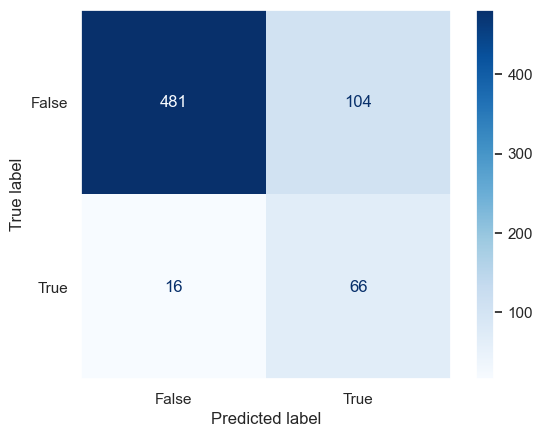

In [65]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, gaussianNB)

In [66]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[3,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[3,2] = numeroAcertos
dfComparaAlgoritmo.iloc[3,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão        -       -     -
5                            SVM        -       -     -
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.5 - Árvores de Decisão

In [67]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "min_samples_split": [2, 3, 4, 5, 6],
    "max_depth": [100, 150, 200, 350, 400, 550],
    "criterion": ['gini', 'log_loss', 'entropia'],
    "splitter": ["best", "random"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
decisionTreeClassifier = DecisionTreeClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = decisionTreeClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosAR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosAR.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 89.853%
Melhores parâmetros para o modelo: {'splitter': 'random', 'min_samples_split': 6, 'max_depth': 550, 'criterion': 'log_loss'}


In [68]:
# Criando o modelo
decisionTreeClassifier = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=50)

# Treinamento do modelo
decisionTreeClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = decisionTreeClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 90.40%
Número de acertos: 603
Número de erros: 64


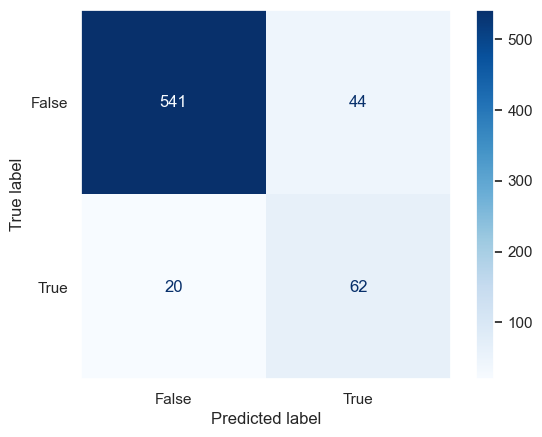

In [69]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, decisionTreeClassifier)

In [70]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[4,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[4,2] = numeroAcertos
dfComparaAlgoritmo.iloc[4,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM        -       -     -
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.6 - Support Vector Machines - SVM

In [71]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
'''
parametros = {
   "C": [0.001,0.01,0.1,1.0],
   "kernel": ["linear", "poly", "rbf", "sigmoid"],
   "decision_function_shape": ["ovo", "ovr"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
svc = SVC()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = svc, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosSVM = []
for k in randomizedSearch.best_params_:
    melhoresParametrosSVM.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)
'''

'\nparametros = {\n   "C": [0.001,0.01,0.1,1.0],\n   "kernel": ["linear", "poly", "rbf", "sigmoid"],\n   "decision_function_shape": ["ovo", "ovr"]\n}\n\n# Cria o modelo que desejamos testar os melhores parâmetros\nsvc = SVC()\n\n# Cria o objeto do tipo RandomizedSearchCV\nrandomizedSearch = RandomizedSearchCV(estimator = svc, param_distributions = parametros, random_state = 11)\n\n# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.\nrandomizedSearch.fit(X, y)\n\n# Salvando os melhores parâmetros em uma lista\nmelhoresParametrosSVM = []\nfor k in randomizedSearch.best_params_:\n    melhoresParametrosSVM.append(randomizedSearch.best_params_[k])\n\n# Print do resultado\nprint("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")\nprint("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)\n'

In [72]:
# Criando o modelo
# Melhores parâmetros para o modelo: {'kernel': 'linear', 'decision_function_shape': 'ovo', 'C': 0.01}
# svc = SVC(kernel = melhoresParametrosSVM[0], decision_function_shape = melhoresParametrosSVM[1], C = melhoresParametrosSVM[2]) 
svc = SVC(kernel = 'linear', decision_function_shape = 'ovo', C = 0.01) 

# Treinamento do modelo
svc.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = svc.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 74.66%
Número de acertos: 498
Número de erros: 169


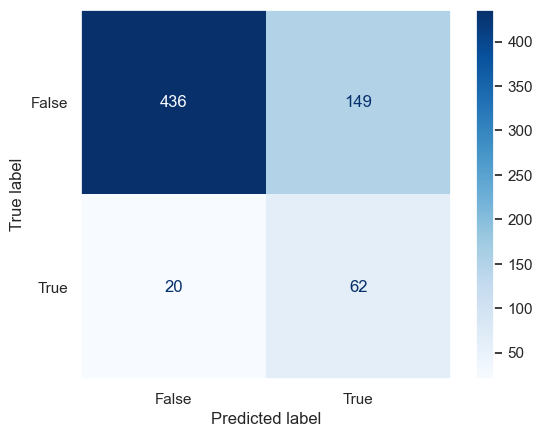

In [73]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, svc)

In [74]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[5,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[5,2] = numeroAcertos
dfComparaAlgoritmo.iloc[5,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest        -       -     -
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.7 - Random Forest

In [75]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_estimators": [100, 106, 108, 110],
    "criterion": ['gini', 'log_loss', 'entropia'], 
    "max_depth": [None, 2, 5, 6, 7],
    "min_samples_split": [6, 7, 8],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [5, 6, 7]
}

# Cria o modelo que desejamos testar os melhores parâmetros
randomForestClassifier = RandomForestClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = randomForestClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 92.435%
Melhores parâmetros para o modelo: {'n_estimators': 106, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': None, 'criterion': 'log_loss'}


In [76]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(n_estimators = melhoresParametros[0], 
                                                min_samples_split = melhoresParametros[1],
                                                min_samples_leaf = melhoresParametros[2],
                                                max_features = melhoresParametros[3],          
                                                max_depth = melhoresParametros[4],
                                                criterion = melhoresParametros[5],
                                                random_state=92)

# Treinamento do modelo
randomForestClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = randomForestClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 93.55%
Número de acertos: 624
Número de erros: 43


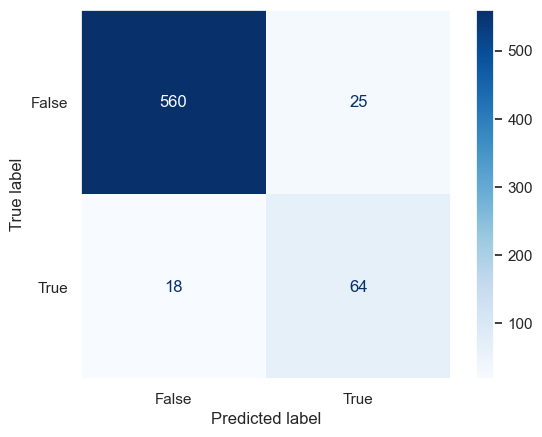

In [77]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, randomForestClassifier)

In [78]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[6,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[6,2] = numeroAcertos
dfComparaAlgoritmo.iloc[6,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest   93.55%     624    43
7             Bagging Classifier        -       -     -
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.8 - Bagging Classifier

In [79]:
# Cria o modelo de árvore de decisão
decisionTreeClassifierBC = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=50)

# Criando o modelo Bagging Classifier
baggingClassifier = BaggingClassifier(base_estimator = decisionTreeClassifierBC, random_state = 1)

# Treinamento do modelo
baggingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = baggingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 92.80%
Número de acertos: 619
Número de erros: 48


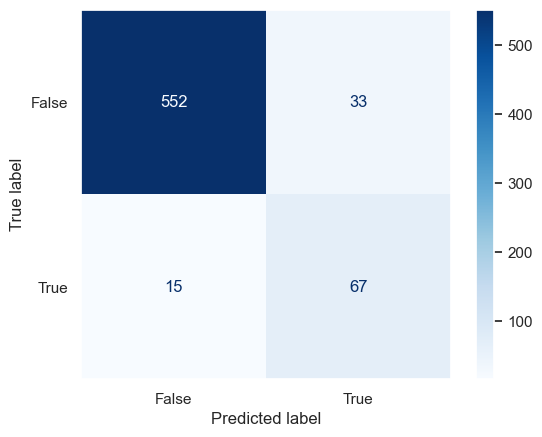

In [80]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, baggingClassifier)

In [81]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[7,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[7,2] = numeroAcertos
dfComparaAlgoritmo.iloc[7,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest   93.55%     624    43
7             Bagging Classifier   92.80%     619    48
8                       AdaBoost        -       -     -
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.9 - AdaBoost

In [82]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [50, 100, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
   "algorithm": ["SAMME", "SAMME.R"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
adaBoostClassifier = AdaBoostClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = adaBoostClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 87.571%
Melhores parâmetros para o modelo: {'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}


In [83]:
# Criando o modelo
adaBoostClassifier = AdaBoostClassifier(n_estimators=melhoresParametros[0],
                           learning_rate=melhoresParametros[1],
                           algorithm=melhoresParametros[2])

# Treinamento do modelo
adaBoostClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = adaBoostClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 86.66%
Número de acertos: 578
Número de erros: 89


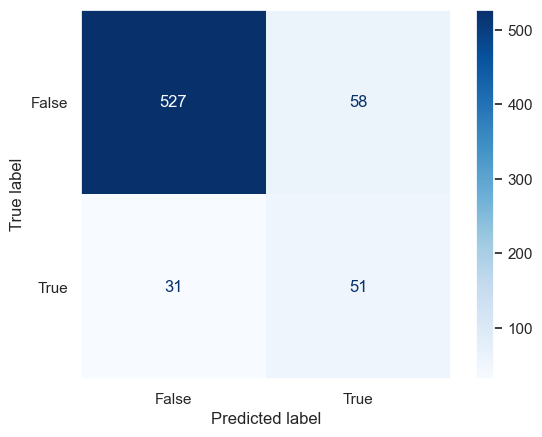

In [84]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, adaBoostClassifier)

In [85]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[8,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[8,2] = numeroAcertos
dfComparaAlgoritmo.iloc[8,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest   93.55%     624    43
7             Bagging Classifier   92.80%     619    48
8                       AdaBoost   86.66%     578    89
9              Voting Classifier        -       -     -
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.10 - Voting Classifier

In [86]:
# Criando os modelos
listaDeModelos = []

# Cria o modelo Regressão Logística
regressaoLogisticaVT = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])
listaDeModelos.append(('Regressão Logística', regressaoLogisticaVT))

# Cria o modelo Árvore de Decisão
decisionTreeClassifierVT = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=14)
listaDeModelos.append(('Árvore de Decisão', decisionTreeClassifierVT))

# Cria o modelo SVM
# Melhores parâmetros para o modelo SVM: {'kernel': 'linear', 'decision_function_shape': 'ovr', 'C': 0.1}
svcVT = SVC(kernel = "linear", decision_function_shape ="ovr", C = 0.1) 
listaDeModelos.append(('SVM', svcVT))

# Criando o modelo Voting Classifier
votingClassifier = VotingClassifier(listaDeModelos)

# Treinamento do modelo
votingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = votingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 77.06%
Número de acertos: 514
Número de erros: 153


In [87]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, votingClassifier)

In [88]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[9,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[9,2] = numeroAcertos
dfComparaAlgoritmo.iloc[9,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest   93.55%     624    43
7             Bagging Classifier   92.80%     619    48
8                       AdaBoost   86.66%     578    89
9              Voting Classifier   77.06%     514   153
10        Gradient Tree Boosting        -       -     -
11                       XGBoost        -       -     -

### 11.11 - Gradient Tree Boosting

In [89]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [100, 110, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
}

# Cria o modelo que desejamos testar os melhores parâmetros
gradientBoostingClassifier = GradientBoostingClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = gradientBoostingClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 92.585%
Melhores parâmetros para o modelo: {'n_estimators': 110, 'learning_rate': 0.1}


In [90]:
# Criando o modelo
gradientBoostingClassifier = GradientBoostingClassifier(n_estimators = melhoresParametros[0],
                                   learning_rate=melhoresParametros[1]
                                   )

# Treinamento do modelo
gradientBoostingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gradientBoostingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 93.40%
Número de acertos: 623
Número de erros: 44


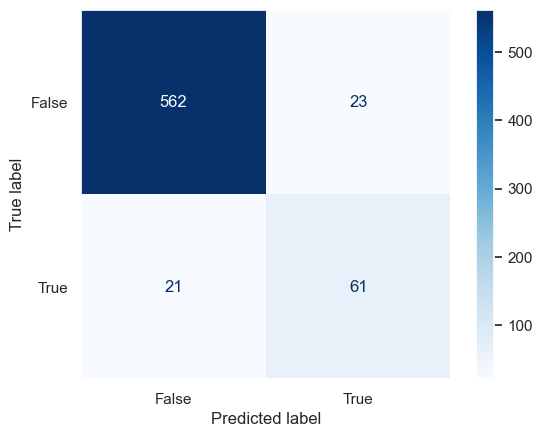

In [91]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, gradientBoostingClassifier)

In [92]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[10,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[10,2] = numeroAcertos
dfComparaAlgoritmo.iloc[10,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest   93.55%     624    43
7             Bagging Classifier   92.80%     619    48
8                       AdaBoost   86.66%     578    89
9              Voting Classifier   77.06%     514   153
10        Gradient Tree Boosting   93.40%     623    44
11                       XGBoost        -       -     -

### 11.12 - XGBoost

In [93]:
# XGBooster exige que a variável alvo inicie com o valor zero, caso contrário ocorrerá erro

# Verificando se existe algum valor igual a zero na variável alvo 
if len(Ytreino[Ytreino == 0]) == 0:
    
    # Cria o objeto encoder
    encoder = LabelEncoder()

    # Cria uma nova coluna com a variável alvo com valores numéricos
    Ytreino = encoder.fit_transform(Ytreino)
    Yteste = encoder.fit_transform(Yteste)

    print("Foi realizado o enconder em Ytreino e Yteste para utilizar o XGBooster")
else:
    print("NÃO foi necessário realizar o encoder para utilizar o XGBooster")

NÃO foi necessário realizar o encoder para utilizar o XGBooster


In [94]:
# Criando o modelo
xgb = XGBClassifier(booster='gbtree', 
                    colsample_bynode= 0.8,
                    learning_rate= 0.15, 
                    max_depth= 5,
                    num_parallel_tree= 20, 
                    subsample= 0.8,
                    tree_method= 'gpu_hist',
                    nthread=16
                   )

# Criar o modelo com o código abaixo, caso o computador não tenha placa de vídeo dedicada com suporte a CUDA
# xgb = XGBClassifier()

# Treinamento do modelo
xgb.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 94.60%
Número de acertos: 631
Número de erros: 36


In [95]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, xgb)

In [96]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[11,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[11,2] = numeroAcertos
dfComparaAlgoritmo.iloc[11,3] = numeroErros
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
0            Regressão Logística   71.81%     479   188
1   Linear Discriminant Analysis   64.32%     429   238
2                            KNN   67.02%     447   220
3                    Naive Bayes   82.01%     547   120
4              Árvore de Decisão   90.40%     603    64
5                            SVM   74.66%     498   169
6                  Random Forest   93.55%     624    43
7             Bagging Classifier   92.80%     619    48
8                       AdaBoost   86.66%     578    89
9              Voting Classifier   77.06%     514   153
10        Gradient Tree Boosting   93.40%     623    44
11                       XGBoost   94.60%     631    36

## 12 - Selecionando o modelo

In [97]:
# Ordena o DataFrame de acordo o número de acertos, em ordem descrecente
dfComparaAlgoritmo.sort_values(by=["Acertos"], ascending=False, inplace=True)
dfComparaAlgoritmo

Algoritmo Acurácia Acertos Erros
11                       XGBoost   94.60%     631    36
6                  Random Forest   93.55%     624    43
10        Gradient Tree Boosting   93.40%     623    44
7             Bagging Classifier   92.80%     619    48
4              Árvore de Decisão   90.40%     603    64
8                       AdaBoost   86.66%     578    89
3                    Naive Bayes   82.01%     547   120
9              Voting Classifier   77.06%     514   153
5                            SVM   74.66%     498   169
0            Regressão Logística   71.81%     479   188
2                            KNN   67.02%     447   220
1   Linear Discriminant Analysis   64.32%     429   238

In [98]:
# Selecionando o modelo final
modeloSelecionado = dfComparaAlgoritmo.iloc[0,0]

if modeloSelecionado == 'Regressão Logística':
    modeloFinal = regressaoLogistica
elif modeloSelecionado == 'Linear Discriminant Analysis':
    modeloFinal= linearDiscriminantAnalysis
elif modeloSelecionado == 'KNN':
    modeloFinal = kNeighborsClassifier
elif modeloSelecionado == 'Naive Bayes':
    modeloFinal = gaussianNB
elif modeloSelecionado == 'Árvore de Decisão':
    modeloFinal = decisionTreeClassifier
elif modeloSelecionado == 'SVM':
    modeloFinal = svc
elif modeloSelecionado == 'Random Forest':
    modeloFinal = randomForestClassifier
elif modeloSelecionado == 'Bagging Classifier':
    modeloFinal = baggingClassifier
elif modeloSelecionado == 'AdaBoost':
    modeloFinal = adaBoostClassifier
elif modeloSelecionado == 'Voting Classifier':
    modeloFinal = votingClassifier
elif modeloSelecionado == 'Gradient Tree Boosting':
    modeloFinal = gradientBoostingClassifier
elif modeloSelecionado == "XGBoost":
    modeloFinal = xgb

modeloFinal

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=16, num_parallel_tree=20,
              predictor=None, ...)

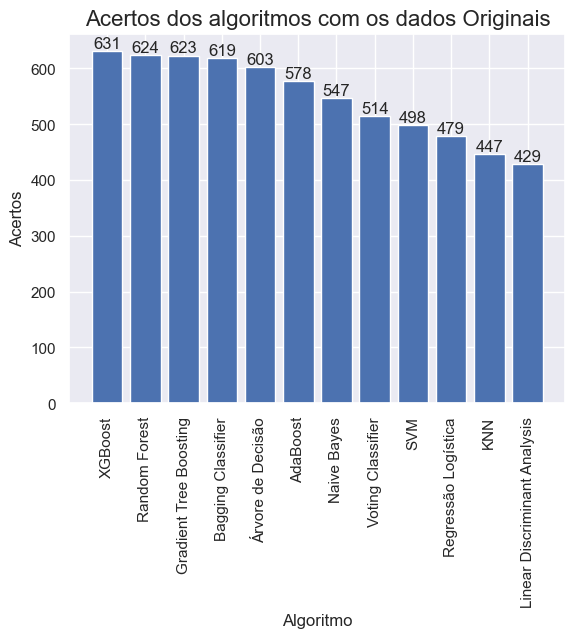

In [99]:
# Gráfico com os acertos dos algoritmos
fig, ax = plt.subplots()
ax.bar(dfComparaAlgoritmo.Algoritmo, dfComparaAlgoritmo["Acertos"])
ax.set_title("Acertos dos algoritmos com os dados " + apresentacaoDosDados, fontsize = 16)
ax.set_xlabel("Algoritmo", fontsize = 12)
ax.set_ylabel("Acertos", fontsize = 12)
ax.set_xticks(dfComparaAlgoritmo.Algoritmo) 
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
# Salvando a figura no disco
plt.savefig("Dados\Churn-in-Telecom\Acertos dos algoritmos com os dados " + apresentacaoDosDados + ".jpg", bbox_inches='tight')
plt.show()

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [100]:
# Salvando o modelo
arquivo = 'Dados/Churn-in-Telecom/modeloClassificadorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [101]:
# Carregando o modelo
modeloClassificador = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloClassificador

Modelo carregado!


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=16, num_parallel_tree=20,
              predictor=None, ...)

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [102]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/Churn-in-Telecom/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/Churn-in-Telecom/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [103]:
# Visualizando o dataframe
dfValidacao

Estado  Tamanho Conta  Cod area Plano Internacional Plano correio de voz  \
1077     NY            108       415                  no                   no   
3105     ME             57       415                  no                   no   

      Numero mensagens vmail  Total minutos diarios  Total chamadas diarias  \
1077                       0                  154.2                     123   
3105                       0                  221.1                     101   

      Total carga diaria  Total minutos a tarde  Total chamadas a tarde  \
1077               26.21                  112.3                      86   
3105               37.59                  236.7                      65   

      Total carga a tarde  Total minutos a noite  Total chamadas a noite  \
1077                 9.55                  246.4                      75   
3105                20.12                  252.3                     137   

      Total carga a noite  Total minutos internacionais  \
1077                11.09                          15.4   
3105                11.35                           9.5   

      Total chamadas internacionais  Total carga internacional  \
1077                              4                       4.16   
3105                              1                       2.57   

      Numero chamadas atendimento ao cliente  rotatividade  
1077                                       4          True  
3105                                       0         False

In [104]:
# Convertendo as variáveis categóricas de texto para números
# Cria o objeto encoder
encoder = LabelEncoder()

# loop que percorre as colunas
for k in dfValidacao.columns[0:19]:
    
    # Verifica se os valores da coluna são do tipo texto
    if dfValidacao[k].dtype == object:
        dfValidacao[k] = encoder.fit_transform(dfValidacao[k])
dfValidacao

Estado  Tamanho Conta  Cod area  Plano Internacional  \
1077       1            108       415                    0   
3105       0             57       415                    0   

      Plano correio de voz  Numero mensagens vmail  Total minutos diarios  \
1077                     0                       0                  154.2   
3105                     0                       0                  221.1   

      Total chamadas diarias  Total carga diaria  Total minutos a tarde  \
1077                     123               26.21                  112.3   
3105                     101               37.59                  236.7   

      Total chamadas a tarde  Total carga a tarde  Total minutos a noite  \
1077                      86                 9.55                  246.4   
3105                      65                20.12                  252.3   

      Total chamadas a noite  Total carga a noite  \
1077                      75                11.09   
3105                     137                11.35   

      Total minutos internacionais  Total chamadas internacionais  \
1077                          15.4                              4   
3105                           9.5                              1   

      Total carga internacional  Numero chamadas atendimento ao cliente  \
1077                       4.16                                       4   
3105                       2.57                                       0   

      rotatividade  
1077          True  
3105         False

In [105]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = dfValidacao[variaveisSelecionadas].values
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    previsoes = modeloClassificador.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDadosPadronizados)

previsoes

array([1, 0])